In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import warnings
pd.set_option('display.precision', 2) 

In [3]:
#read of dataphram and overview of data
df = pd.read_csv('../data/raw/diabetes_dataset.csv')
def overview(df):
    '''
    Erstelle einen Überblick über einige Eigenschaften der Spalten eines DataFrames.
    VARs
        df: Der zu betrachtende DataFrame
    RETURNS:
        overview: Überblick über einige Eigenschaften der Spalten eines DataFrames.
    '''
    overview=display(pd.DataFrame({'dtype': df.dtypes,
                          'total': df.count(),
                          'missing values(n)': df.isna().sum(),
                          'missing values(%)': df.isna().mean()*100,
                          'number of uniques': df.nunique(),
                          'uniques': [df[col].unique() for col in df.columns]
                         }))
    return overview
    
overview(df)

dtype   total  missing values(n)  \
age                                   int64  100000                  0   
gender                               object  100000                  0   
ethnicity                            object  100000                  0   
education_level                      object  100000                  0   
income_level                         object  100000                  0   
employment_status                    object  100000                  0   
smoking_status                       object  100000                  0   
alcohol_consumption_per_week          int64  100000                  0   
physical_activity_minutes_per_week    int64  100000                  0   
diet_score                          float64  100000                  0   
sleep_hours_per_day                 float64  100000                  0   
screen_time_hours_per_day           float64  100000                  0   
family_history_diabetes               int64  100000                  0   
hypertension_history                  int64  100000                  0   
cardiovascular_history                int64  100000                  0   
bmi                                 float64  100000                  0   
waist_to_hip_ratio                  float64  100000                  0   
systolic_bp                           int64  100000                  0   
diastolic_bp                          int64  100000                  0   
heart_rate                            int64  100000                  0   
cholesterol_total                     int64  100000                  0   
hdl_cholesterol                       int64  100000                  0   
ldl_cholesterol                       int64  100000                  0   
triglycerides                         int64  100000                  0   
glucose_fasting                       int64  100000                  0   
glucose_postprandial                  int64  100000                  0   
insulin_level                       float64  100000                  0   
hba1c                               float64  100000                  0   
diabetes_risk_score                 float64  100000                  0   
diabetes_stage                       object  100000                  0   
diagnosed_diabetes                    int64  100000                  0   

                                    missing values(%)  number of uniques  \
age                                               0.0                 73   
gender                                            0.0                  3   
ethnicity                                         0.0                  5   
education_level                                   0.0                  4   
income_level                                      0.0                  5   
employment_status                                 0.0                  4   
smoking_status                                    0.0                  3   
alcohol_consumption_per_week                      0.0                 11   
physical_activity_minutes_per_week                0.0                620   
diet_score                                        0.0                101   
sleep_hours_per_day                               0.0                 71   
screen_time_hours_per_day                         0.0                156   
family_history_diabetes                           0.0                  2   
hypertension_history                              0.0                  2   
cardiovascular_history                            0.0                  2   
bmi                                               0.0                240   
waist_to_hip_ratio                                0.0                 40   
systolic_bp                                       0.0                 86   
diastolic_bp                                      0.0                 60   
heart_rate                                        0.0                 64   
cholesterol_total                                 0.0                210 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5.7  ...               41   
1                                 143         6.7  ...               55   
2                                  57         6.4  ...               66   
3                                  49         3.4  ...               50   
4                                 109         7.2  ...               52   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   
2               99             36              118                   195   
3               79            140              139                   253   
4              125            160              137                   184   

   insulin_level  hba1c  diabetes_risk_score  diabetes_stage  \
0           6.36   8.18                 29.6          Type 2   
1           2.00   5.63                 23.0     No Diabetes   
2           5.07   7.51                 44.7          Type 2   
3           5.28   9.03                 38.2          Type 2   
4          12.74   7.20                 23.5          Type 2   

   diagnosed_diabetes  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1  

[5 rows x 31 columns]

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


<Axes: >

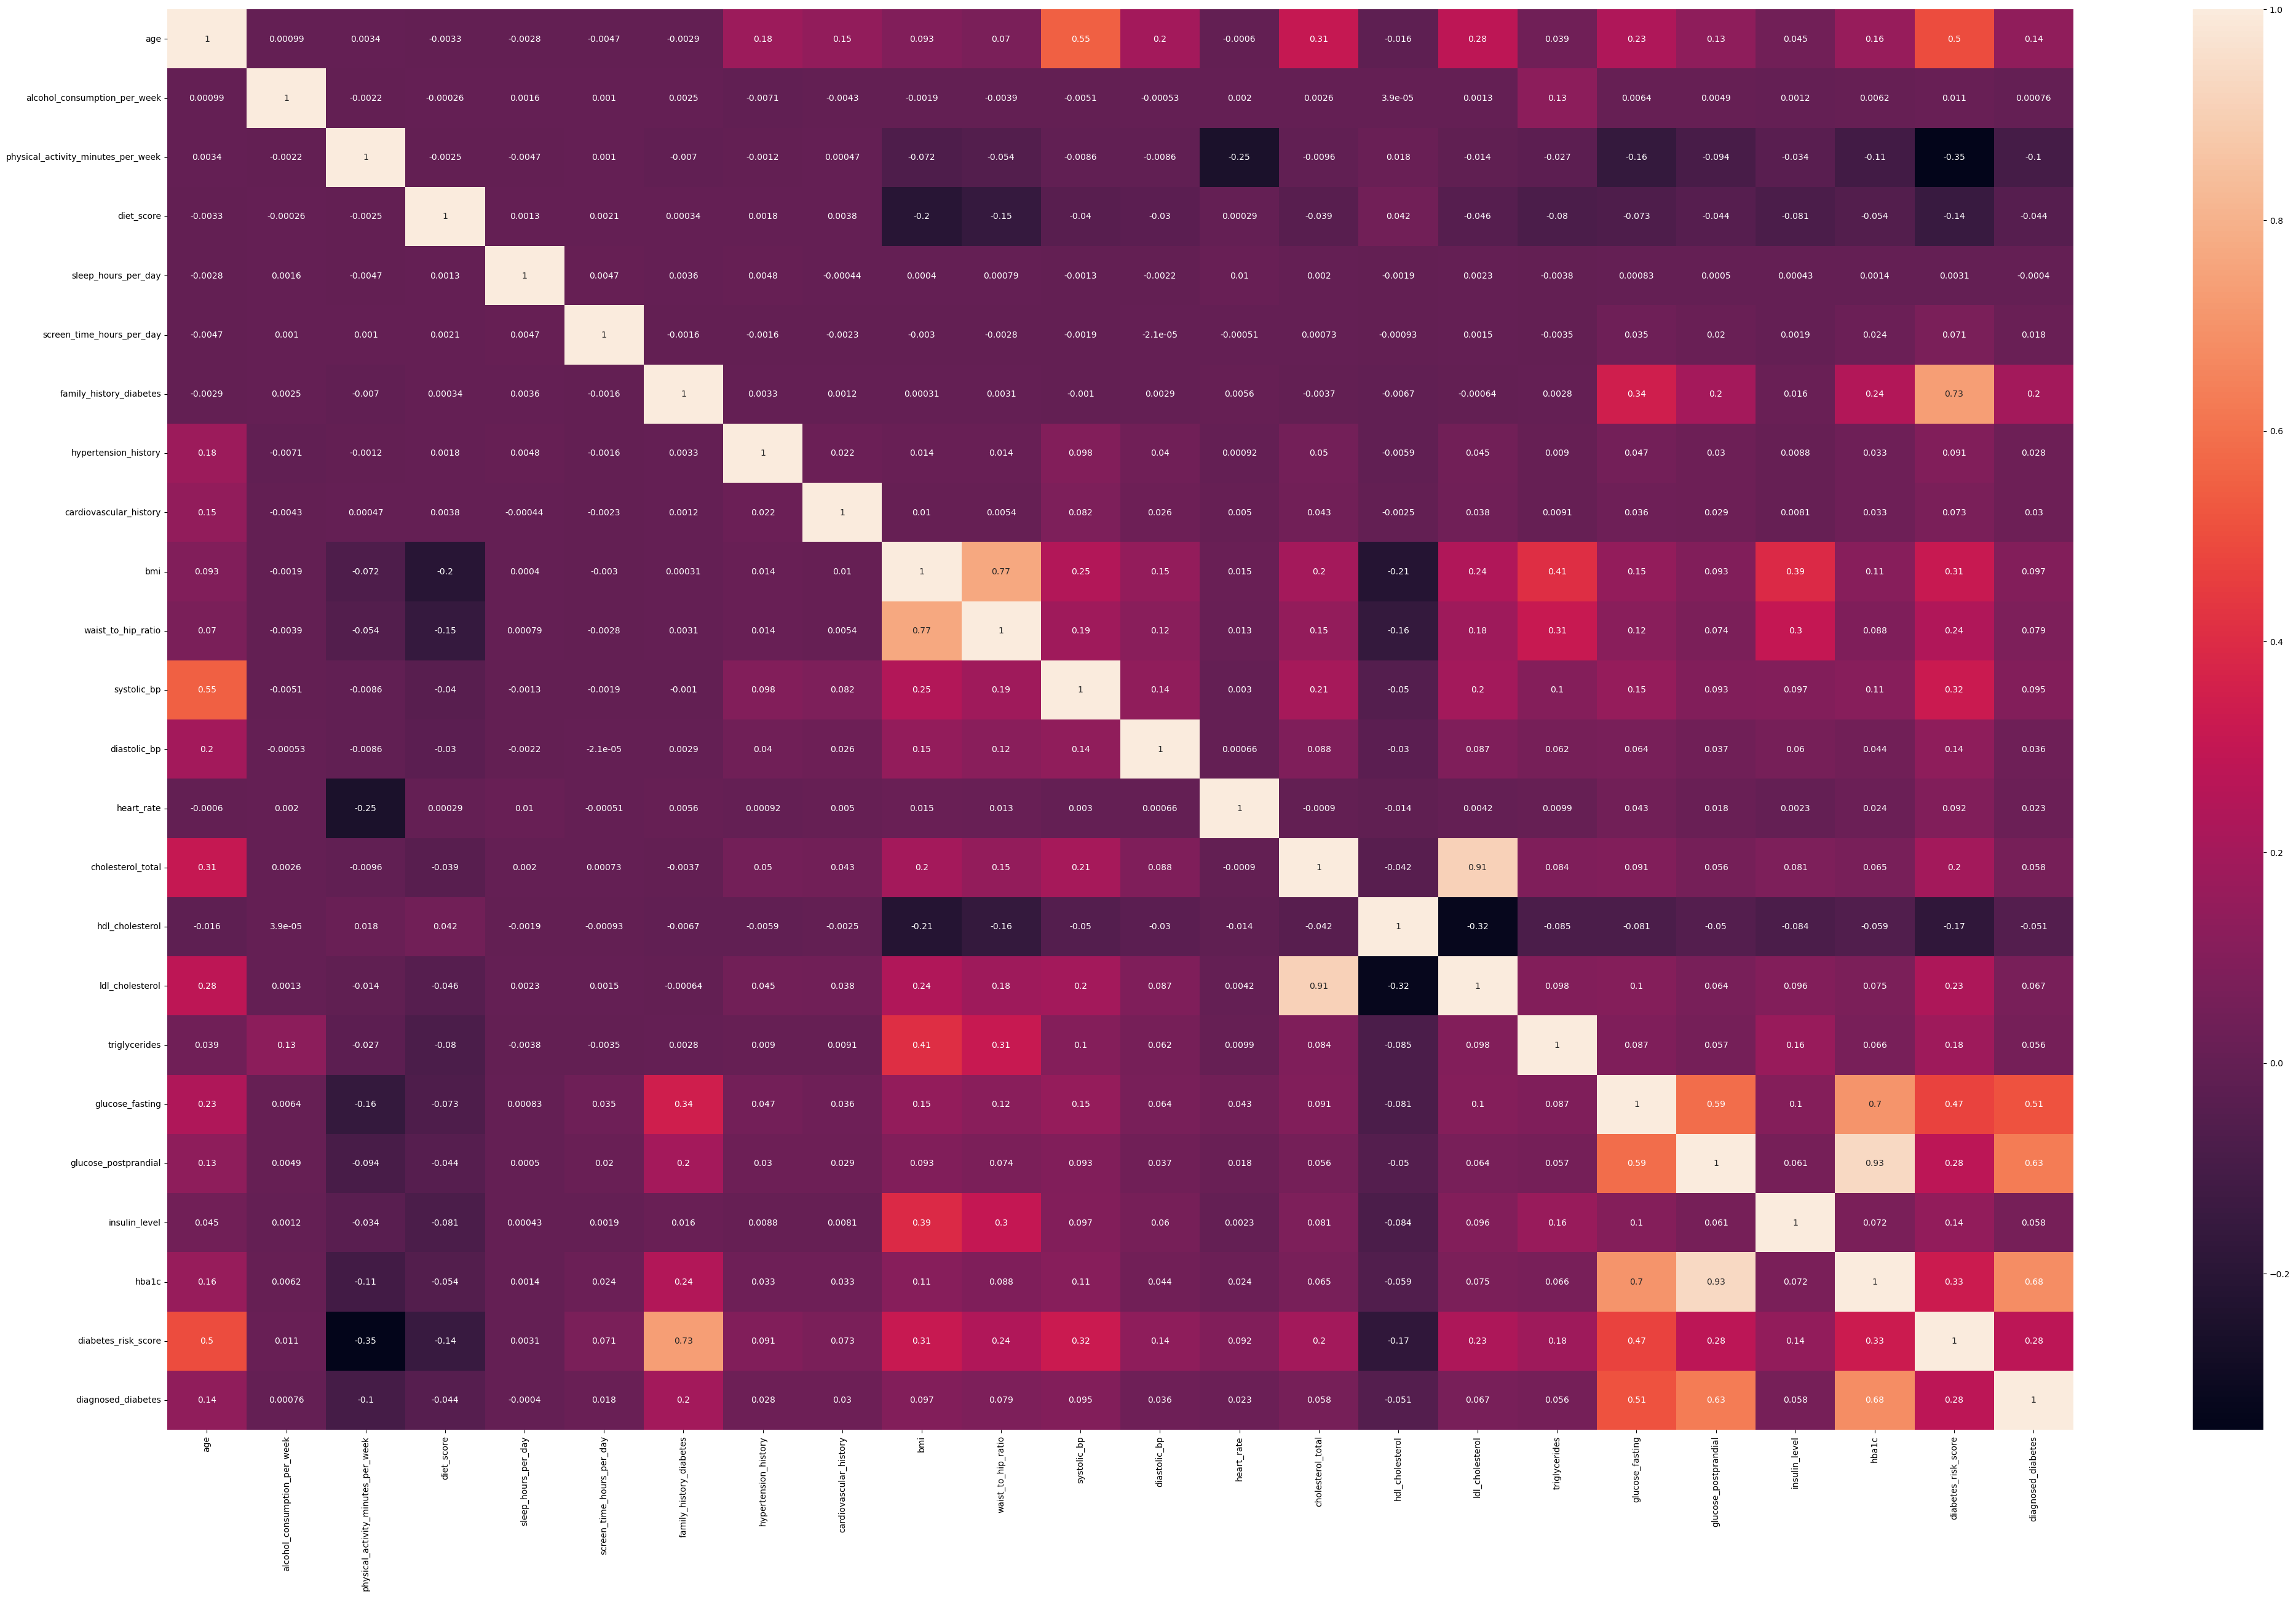

In [4]:
print(df.info())
display(df.head())
print(df.isna().sum())
fig, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, ax=ax)

In [5]:
#change object columns to category columns
display(df.dtypes)
object_columns = df.select_dtypes(include=['object']).columns.tolist()
for column in object_columns:
    df[column]=df[column].astype('category')
print('Change to category columns from object columns')

df.dtypes


age                                     int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
employment_status                      object
smoking_status                         object
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
family_history_diabetes                 int64
hypertension_history                    int64
cardiovascular_history                  int64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholesterol                   

Change to category columns from object columns


age                                      int64
gender                                category
ethnicity                             category
education_level                       category
income_level                          category
employment_status                     category
smoking_status                        category
alcohol_consumption_per_week             int64
physical_activity_minutes_per_week       int64
diet_score                             float64
sleep_hours_per_day                    float64
screen_time_hours_per_day              float64
family_history_diabetes                  int64
hypertension_history                     int64
cardiovascular_history                   int64
bmi                                    float64
waist_to_hip_ratio                     float64
systolic_bp                              int64
diastolic_bp                             int64
heart_rate                               int64
cholesterol_total                        int64
hdl_cholester

In [6]:
print('unique vlues fÜr gender:', df['gender'].unique())
print('unique vlues fÜr ethnicity:', df['ethnicity'].unique())
print('unique vlues fÜr education_level:', df['education_level'].unique())
print('unique vlues fÜr income_level:', df['income_level'].unique())
print('unique vlues fÜr employment_status:', df['employment_status'].unique())
print('unique vlues fÜr smoking_status:', df['smoking_status'].unique())
print('unique vlues fÜr diabetes_stage:', df['diabetes_stage'].unique())

unique vlues fÜr gender: ['Male', 'Female', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']
unique vlues fÜr ethnicity: ['Asian', 'White', 'Hispanic', 'Black', 'Other']
Categories (5, object): ['Asian', 'Black', 'Hispanic', 'Other', 'White']
unique vlues fÜr education_level: ['Highschool', 'Graduate', 'Postgraduate', 'No formal']
Categories (4, object): ['Graduate', 'Highschool', 'No formal', 'Postgraduate']
unique vlues fÜr income_level: ['Lower-Middle', 'Middle', 'Low', 'Upper-Middle', 'High']
Categories (5, object): ['High', 'Low', 'Lower-Middle', 'Middle', 'Upper-Middle']
unique vlues fÜr employment_status: ['Employed', 'Unemployed', 'Retired', 'Student']
Categories (4, object): ['Employed', 'Retired', 'Student', 'Unemployed']
unique vlues fÜr smoking_status: ['Never', 'Former', 'Current']
Categories (3, object): ['Current', 'Former', 'Never']
unique vlues fÜr diabetes_stage: ['Type 2', 'No Diabetes', 'Pre-Diabetes', 'Gestational', 'Type 1']
Categories (5, object): ['G

In [7]:
df.describe()    

age  alcohol_consumption_per_week  \
count  100000.00                     100000.00   
mean       50.12                          2.00   
std        15.60                          1.42   
min        18.00                          0.00   
25%        39.00                          1.00   
50%        50.00                          2.00   
75%        61.00                          3.00   
max        90.00                         10.00   

       physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
count                           100000.00   100000.00            100000.00   
mean                               118.91        5.99                 7.00   
std                                 84.41        1.78                 1.09   
min                                  0.00        0.00                 3.00   
25%                                 57.00        4.80                 6.30   
50%                                100.00        6.00                 7.00   
75%                                160.00        7.20                 7.70   
max                                833.00       10.00                10.00   

       screen_time_hours_per_day  family_history_diabetes  \
count                  100000.00                100000.00   
mean                        6.00                     0.22   
std                         2.47                     0.41   
min                         0.50                     0.00   
25%                         4.30                     0.00   
50%                         6.00                     0.00   
75%                         7.70                     0.00   
max                        16.80                     1.00   

       hypertension_history  cardiovascular_history        bmi  ...  \
count             100000.00               100000.00  100000.00  ...   
mean                   0.25                    0.08      25.61  ...   
std                    0.43                    0.27       3.59  ...   
min                    0.00                    0.00      15.00  ...   
25%                    0.00                    0.00      23.20  ...   
50%                    0.00                    0.00      25.60  ...   
75%                    1.00                    0.00      28.00  ...   
max                    1.00                    1.00      39.20  ...   

       cholesterol_total  hdl_cholesterol  ldl_cholesterol  triglycerides  \
count          100000.00        100000.00        100000.00      100000.00   
mean              185.98            54.04           103.00         121.46   
std                32.01            10.27            33.39          43.37   
min               100.00            20.00            50.00          30.00   
25%               164.00            47.00            78.00          91.00   
50%               186.00            54.00           102.00         121.00   
75%               208.00            61.00           126.00         151.00   
max               318.00            98.00           263.00         344.00   

       glucose_fasting  glucose_postprandial  insulin_level      hba1c  \
count        100000.00             100000.00      100000.00  100000.00   
mean            111.12                160.04           9.06       6.52   
std              13.60                 30.94           4.95       0.81   
min              60.00                 70.00           2.00       4.00   
25%             102.00                139.00           5.09       5.97   
50%             111.00                160.00           8.79       6.52   
75%             120.00                181.00          12.45       7.07   
max             172.00                287.00          32.22       9.80   

       diabetes_risk_score  diagnosed_diabetes  
count            100000.00           100000.00  
mean                 30.22                0.60  
std                   9.06                0.49  
min                   2.70                0.00  
25%                  23.80                0.00  
50%           

In [8]:
df.duplicated().sum()

np.int64(0)

1- Search of count and percentage of each class in diabetes_stage column in this dataset

Number of people in each class in diabetes_stage column


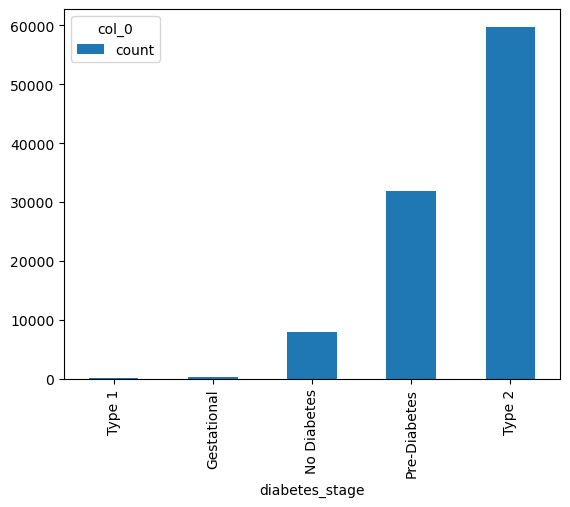

Number of people in each class in diabetes_stage column in percent


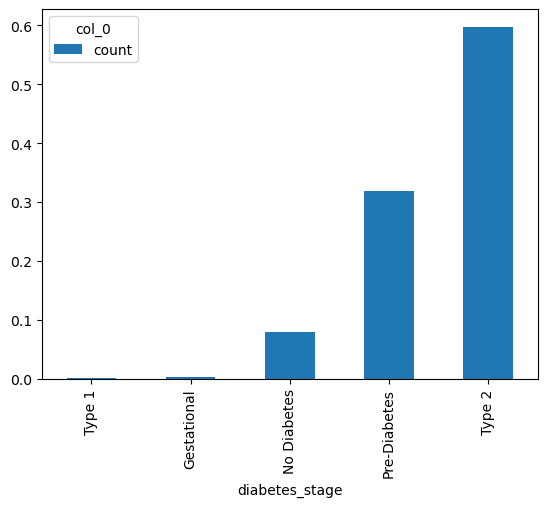

In [9]:
#Number of people in each class in diabetes_stage column
print('Number of people in each class in diabetes_stage column')
df_diabetes_ccount = pd.crosstab(index=df['diabetes_stage'], columns='count').sort_values(by='count').plot(kind='bar');
plt.show()

print('Number of people in each class in diabetes_stage column in percent')
df_diabets_ccount_normalized = pd.crosstab(index=df['diabetes_stage'], columns='count', normalize='columns').sort_values(by='count').plot(kind='bar');

2- Search of total count and percentage of diabetic und not diabetic people in this dataset

counts of diabetics und non-diabetics in this dataset


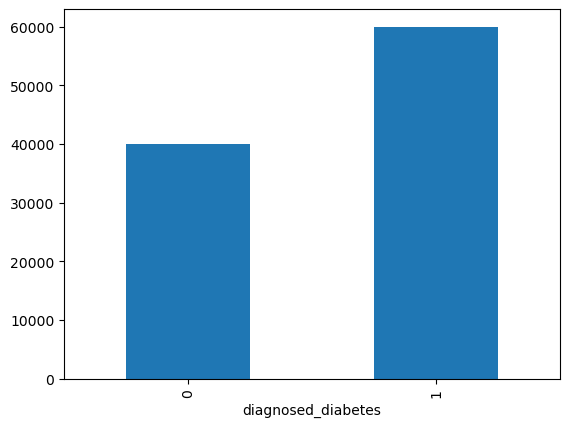

percent of diabetics und non-diabetics in this dataset


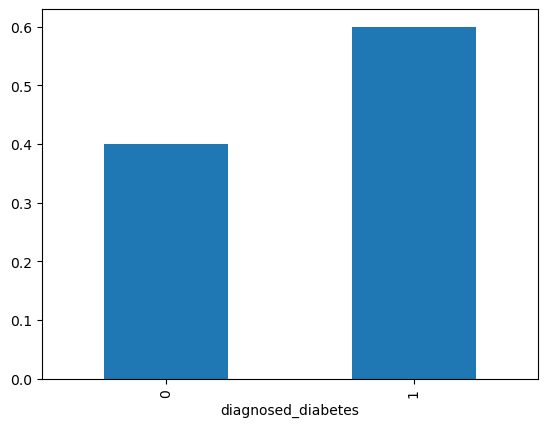

In [10]:
print('counts of diabetics und non-diabetics in this dataset')
df_diabetes_ccount = pd.crosstab(index=df['diagnosed_diabetes'], columns='count').plot(kind='bar', legend=False);
plt.show()

print('percent of diabetics und non-diabetics in this dataset')
df_diabets_ccount_normalized = pd.crosstab(index=df['diagnosed_diabetes'], columns='count', normalize='columns').plot(kind='bar', legend=False);

3- search of varaibles(diabetes_stag, diagnosed_diabetes) by category-columns

The number of each class of gender in this dataset


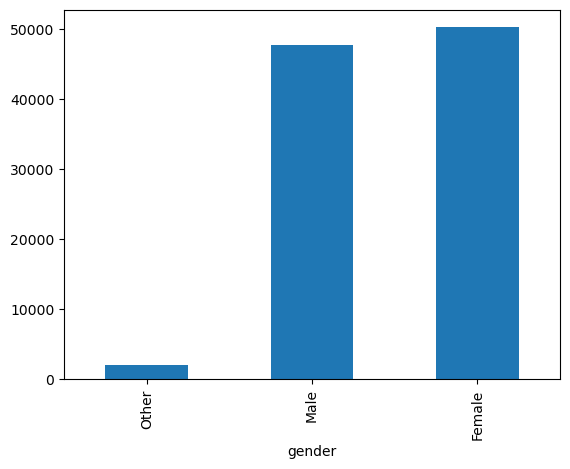

The percentage of each class of gender in this dataset


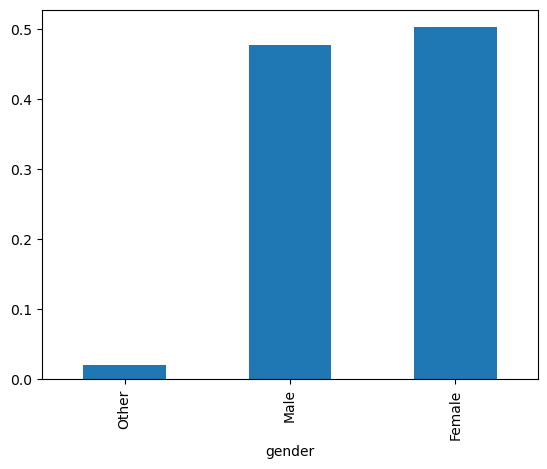

In [11]:
#The number of each class of gender in this dataset
print('The number of each class of gender in this dataset')
df_gender_counts = pd.crosstab(index=df['gender'], columns='count').sort_values(by='count').plot(kind='bar', legend=False)
plt.show()
print('The percentage of each class of gender in this dataset')
df_gender_counts_normalized = pd.crosstab(index=df['gender'], columns='count', normalize='columns').sort_values(by='count').plot(kind='bar', legend=False)

The grupuping of diabetes_stage classen with gender


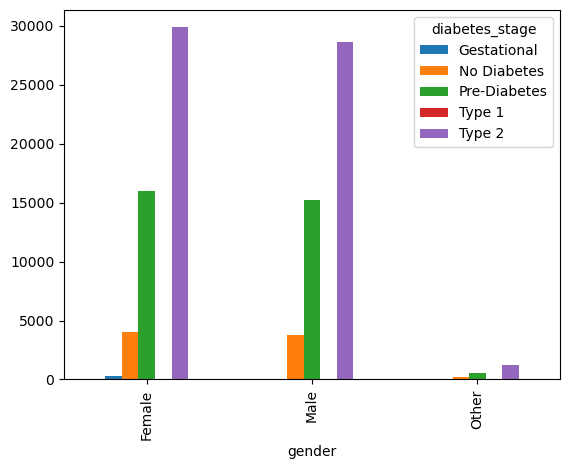

The grupuping of diabetes_stage classen with gender by normalizing of diabetes_stages classes


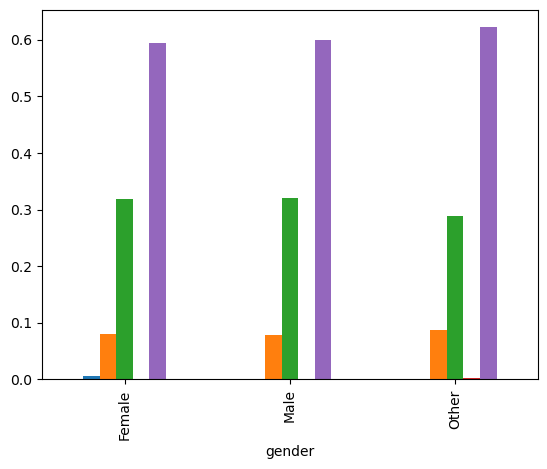

In [12]:
#The grupuping of diabetes_stage classen with gender
print('The grupuping of diabetes_stage classen with gender')
data_diabetes_gender = pd.crosstab(index=df['gender'], columns=df['diabetes_stage'])
data_diabetes_gender.plot(kind='bar');
plt.show()
print('The grupuping of diabetes_stage classen with gender by normalizing of diabetes_stages classes')
data_diabetes_gender_normalized = pd.crosstab(index=df['gender'], columns=df['diabetes_stage'], normalize='index')
data_diabetes_gender_normalized.plot(kind='bar', legend=False);

Type2 patients by gender


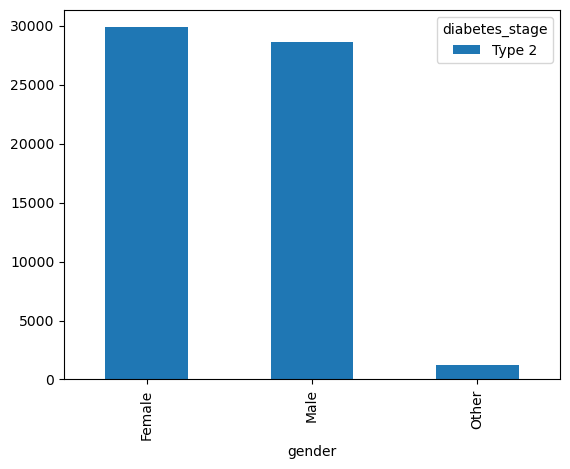

Type2 patients by gender in percent


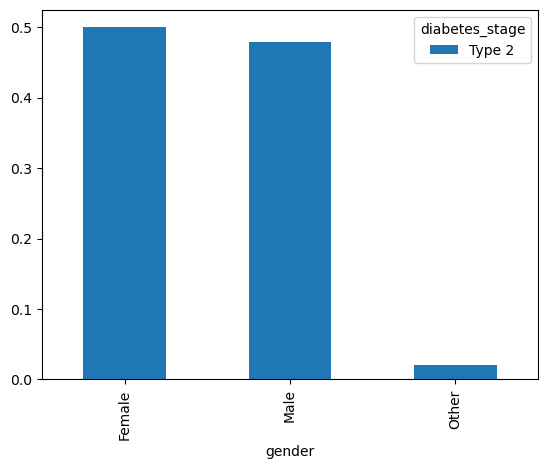

In [13]:
#searching of type2 patients by gender
print('Type2 patients by gender')
df_type2 = df[df['diabetes_stage'] == 'Type 2']
data_diabetes_type2_gender = pd.crosstab(index=df_type2['gender'], columns=df_type2['diabetes_stage'])
data_diabetes_type2_gender.plot(kind='bar');
plt.show()
print('Type2 patients by gender in percent')
data_diabetes_type2_gender_normalized = pd.crosstab(index=df_type2['gender'], columns=df_type2['diabetes_stage'], normalize='columns')
data_diabetes_type2_gender_normalized.plot(kind='bar');

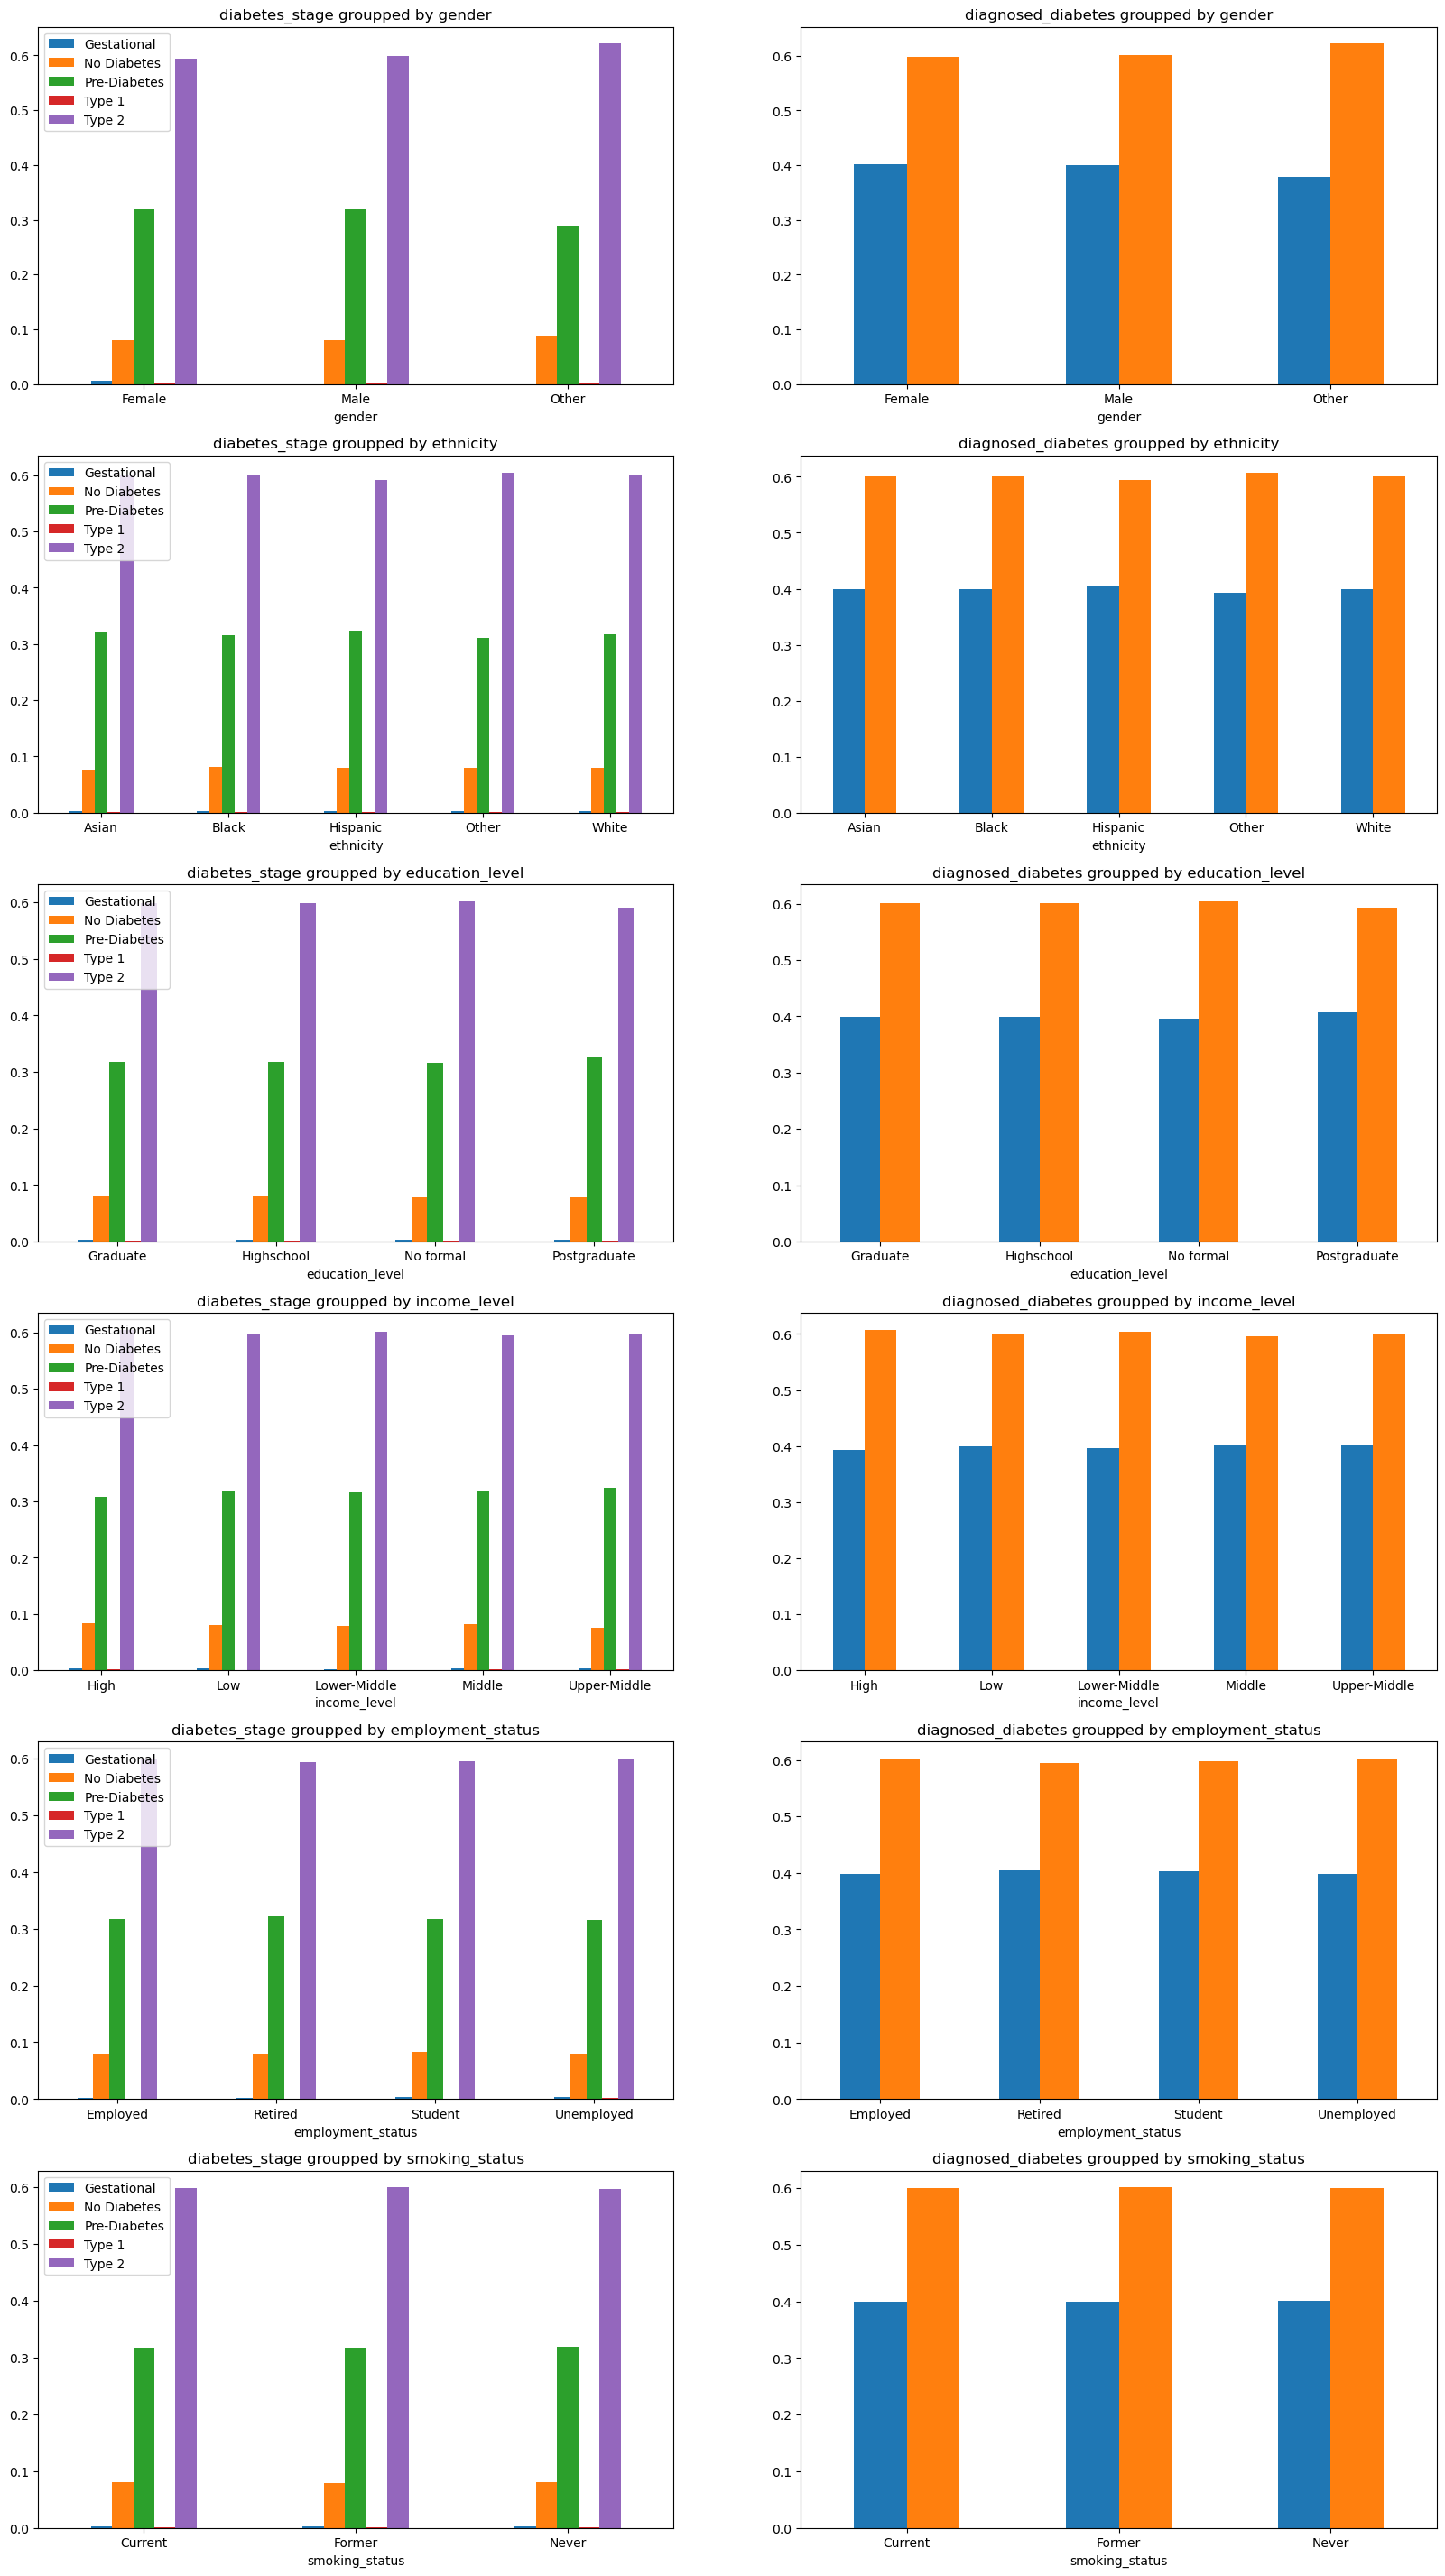

In [14]:
#search of category-columns
category_columns = df.select_dtypes(include=['category']).columns.tolist()
category_columns_without_diabetes_stage = [part for part in category_columns if part != 'diabetes_stage']
fig, ax = plt.subplots(nrows=len(category_columns_without_diabetes_stage), ncols=2, figsize=(20, 6*len(category_columns_without_diabetes_stage)))
for i, column in enumerate(category_columns_without_diabetes_stage):
    pd.crosstab(index=df[column], columns=df["diabetes_stage"], normalize="index").plot(kind="bar", ax=ax[i, 0], legend=True)
    pd.crosstab(index=df[column], columns=df["diagnosed_diabetes"], normalize="index").plot(kind="bar", ax=ax[i, 1], legend=False)
    ax[i, 0].set_title(f'diabetes_stage groupped by {column}')
    ax[i, 1].set_title(f'diagnosed_diabetes groupped by {column}')
    ax[i, 0].xaxis.set_tick_params(labelrotation=0)
    ax[i, 1].xaxis.set_tick_params(labelrotation=0)
    ax[i, 0].legend(loc = 'upper left')


plt.tight_layout;   

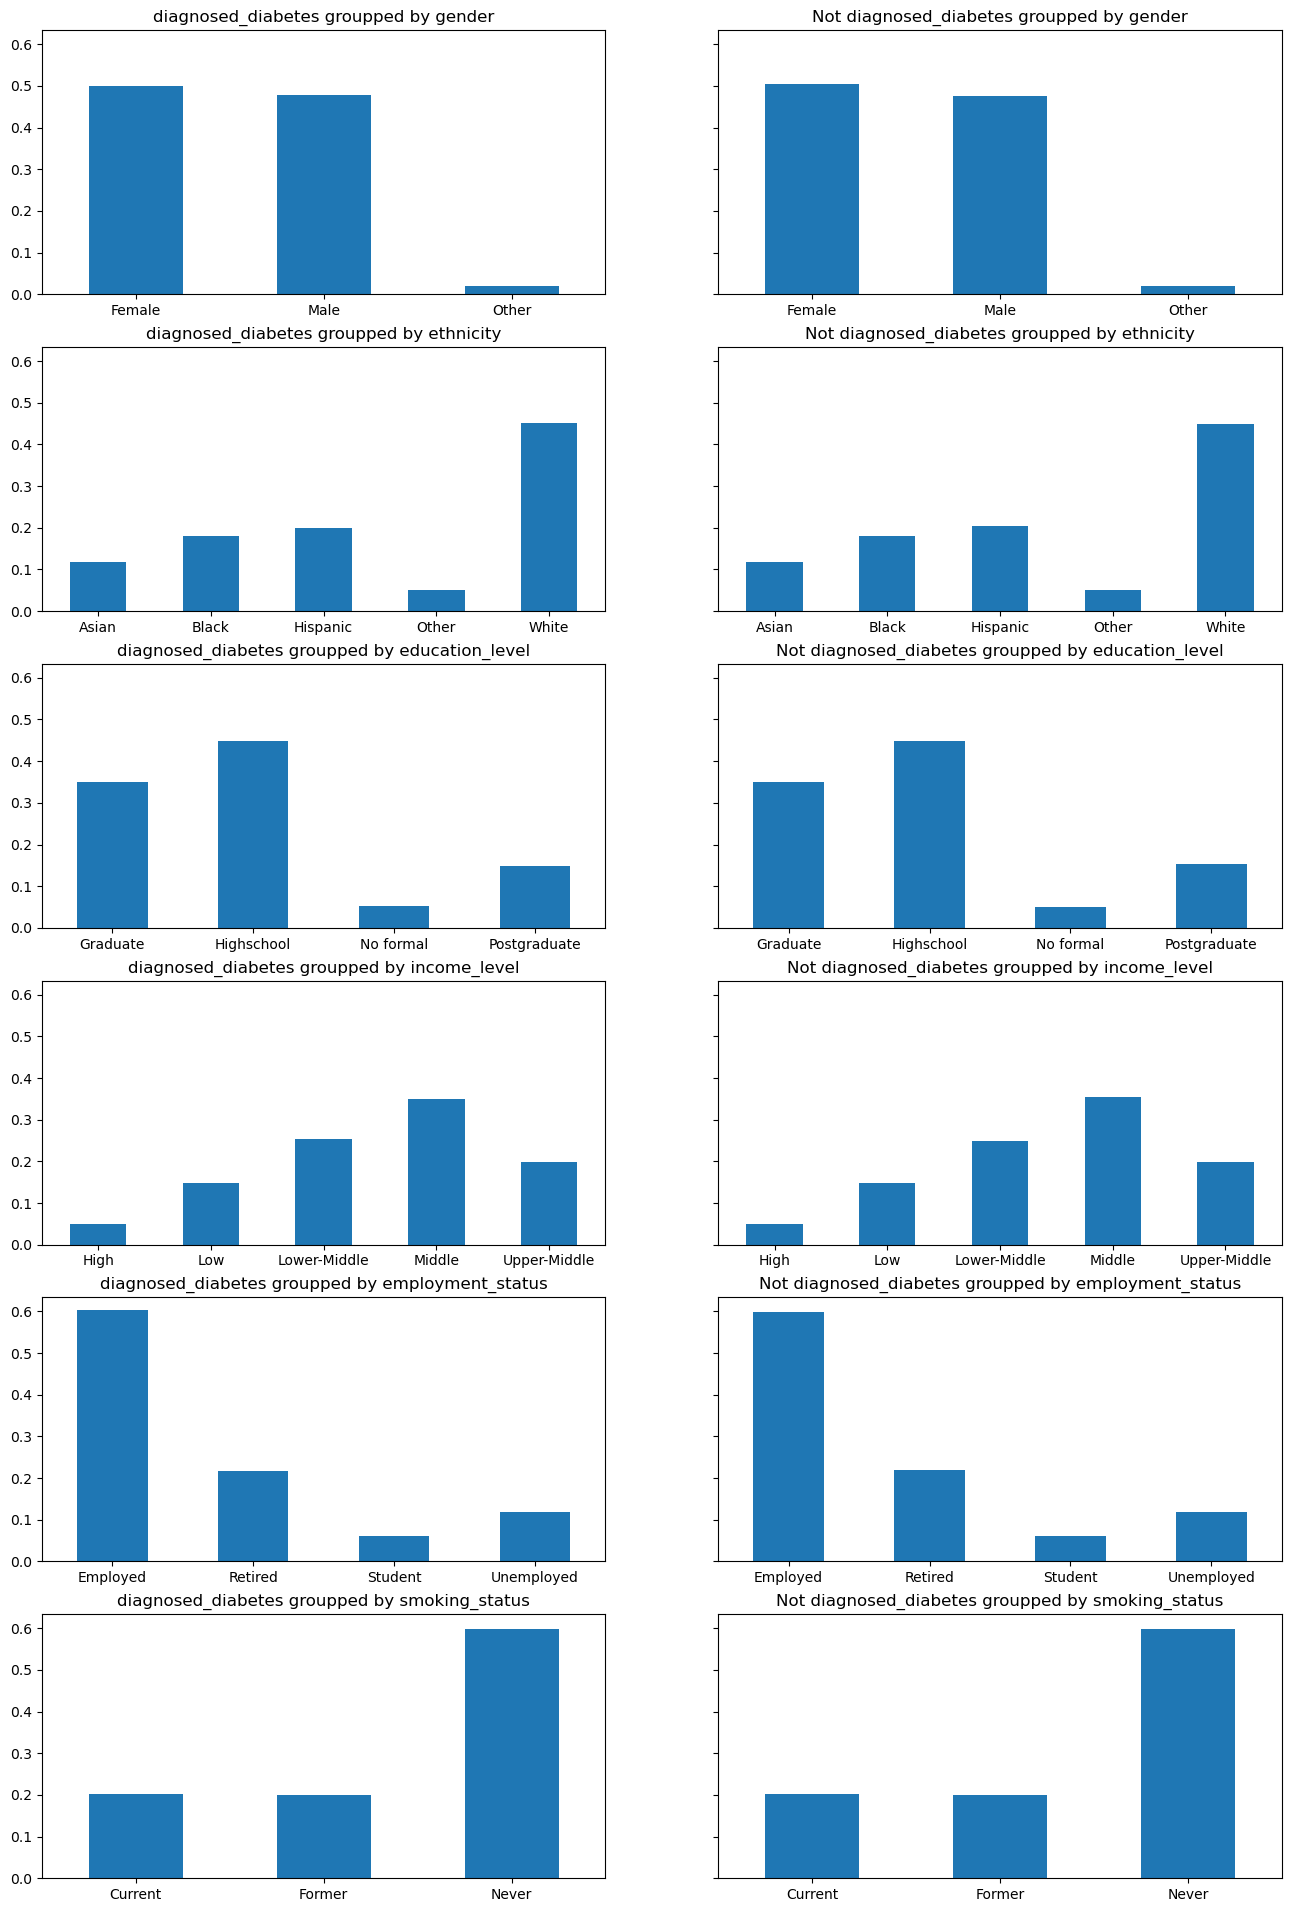

In [15]:
#search of diagnosed_diabetes column by category-columns
df_diabetes_diagnosed = df[df['diagnosed_diabetes'] == 1]
df_not_diabetes_diagnosed = df[df['diagnosed_diabetes'] == 0]

fig, ax = plt.subplots(nrows=len(category_columns_without_diabetes_stage), ncols=2, sharey=True, figsize=(16, 4*len(category_columns_without_diabetes_stage)))
for i, column in enumerate(category_columns_without_diabetes_stage):
    pd.crosstab(index=df_diabetes_diagnosed[column], columns=df_diabetes_diagnosed["diagnosed_diabetes"], normalize="columns").plot(kind="bar", ax=ax[i, 0], legend=False)
    pd.crosstab(index=df_not_diabetes_diagnosed[column], columns=df_not_diabetes_diagnosed["diagnosed_diabetes"], normalize="columns").plot(kind="bar", ax=ax[i, 1], legend=False)
    ax[i, 0].set_title(f'diagnosed_diabetes groupped by {column}')
    ax[i, 1].set_title(f'Not diagnosed_diabetes groupped by {column}')
    ax[i, 0].xaxis.set_tick_params(labelrotation=0)
    ax[i, 1].xaxis.set_tick_params(labelrotation=0)
    ax[i, 0].set_xlabel(None)
    ax[i, 1].set_xlabel(None)

plt.tight_layout;   

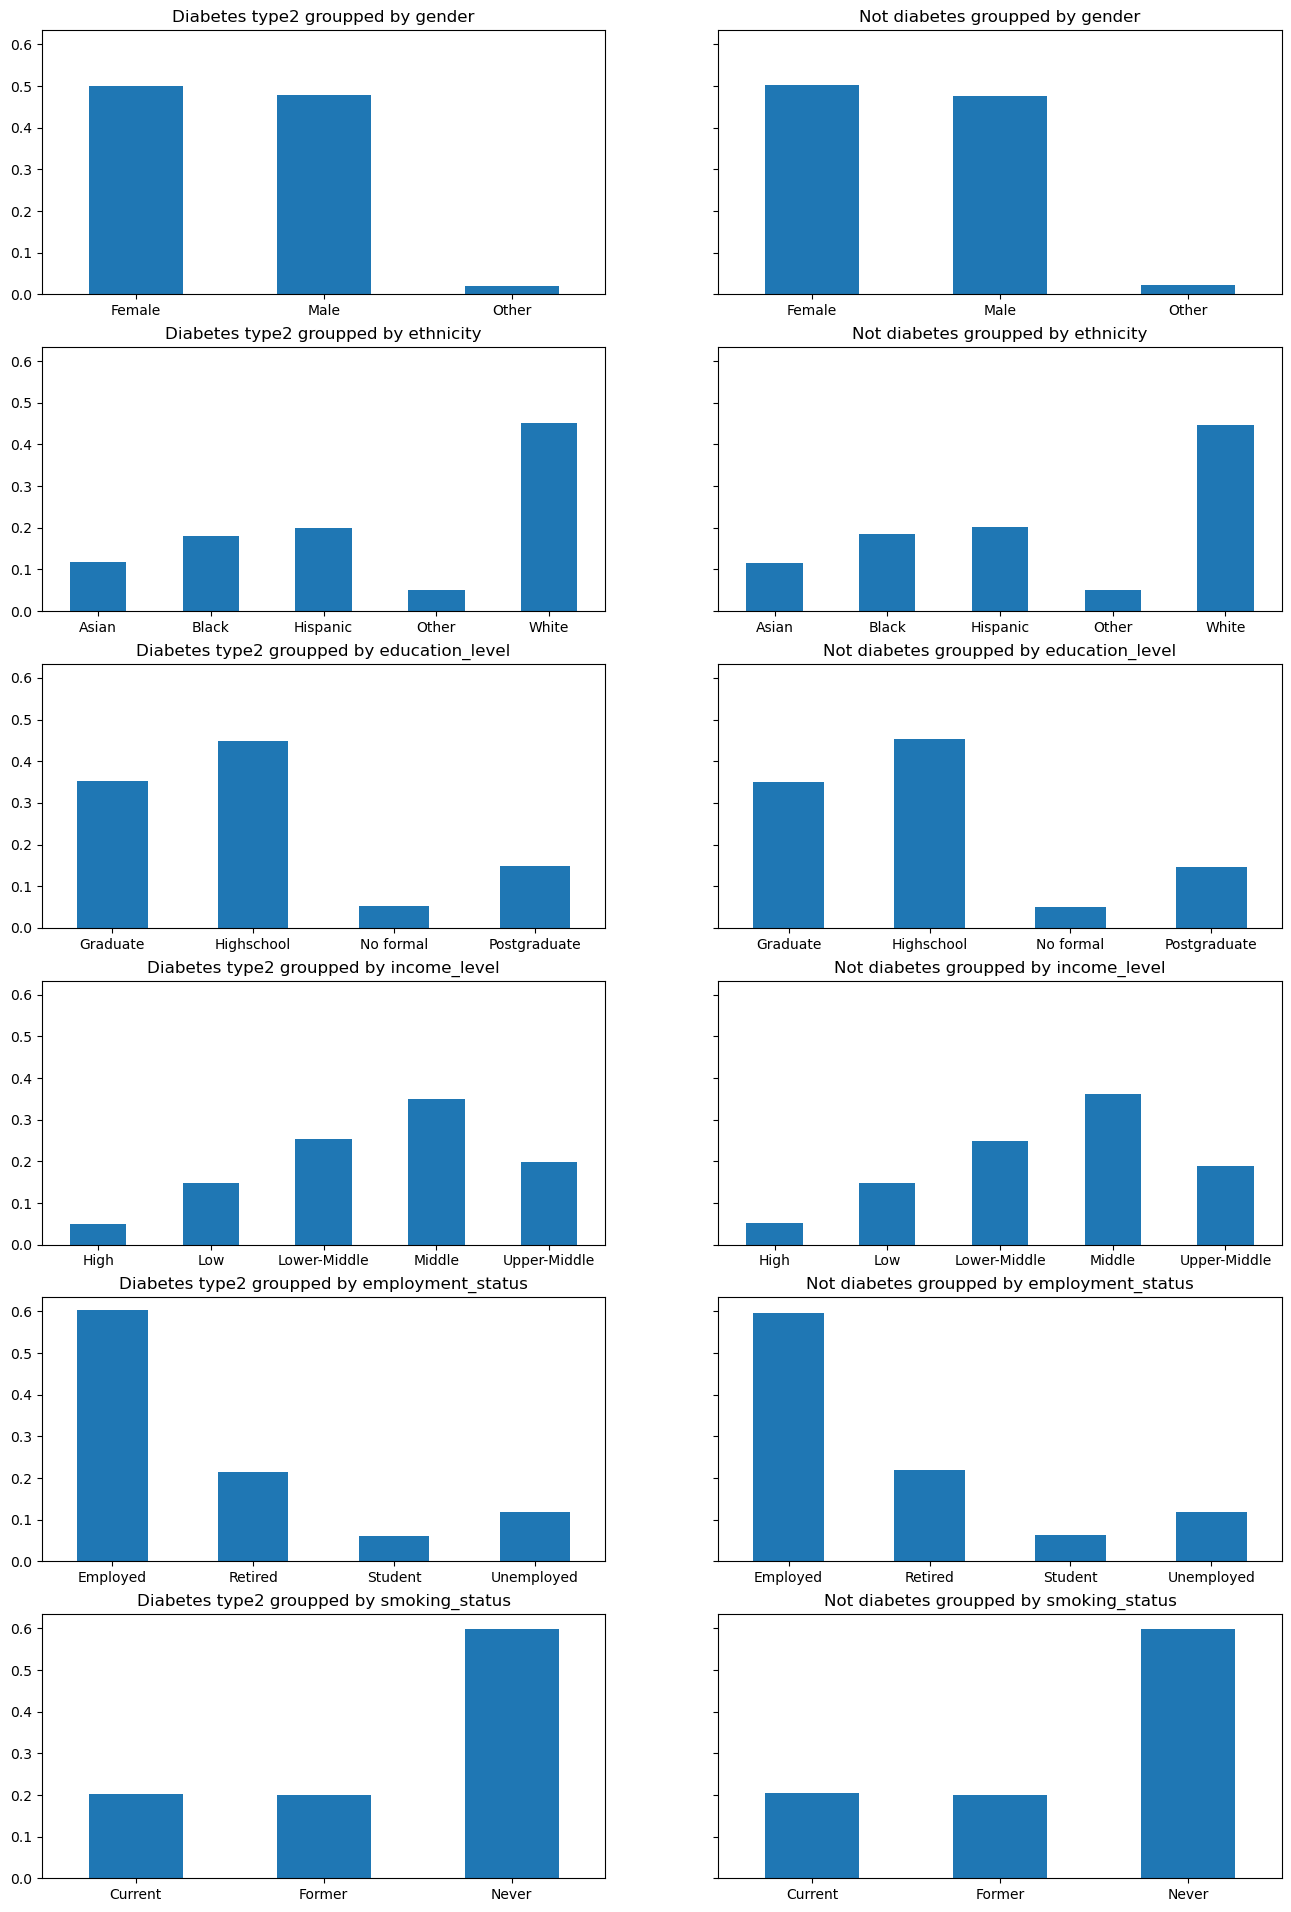

In [16]:
#search of diabetes type2 by category-columns
df_diabetes_stage_type2 = df[df['diabetes_stage'] == 'Type 2']
df_diabetes_stage_no = df[df['diabetes_stage'] == 'No Diabetes']

fig, ax = plt.subplots(nrows=len(category_columns_without_diabetes_stage), ncols=2, sharey=True, figsize=(16, 4*len(category_columns_without_diabetes_stage)))
for i, column in enumerate(category_columns_without_diabetes_stage):
    pd.crosstab(index=df_diabetes_stage_type2[column], columns=df_diabetes_stage_type2["diabetes_stage"], normalize="columns").plot(kind="bar", ax=ax[i, 0], legend=False)
    pd.crosstab(index=df_diabetes_stage_no[column], columns=df_diabetes_stage_no["diabetes_stage"], normalize="columns").plot(kind="bar", ax=ax[i, 1], legend=False)
    ax[i, 0].set_title(f'Diabetes type2 groupped by {column}')
    ax[i, 1].set_title(f'Not diabetes groupped by {column}')
    ax[i, 0].xaxis.set_tick_params(labelrotation=0)
    ax[i, 1].xaxis.set_tick_params(labelrotation=0)
    ax[i, 0].set_xlabel(None)
    ax[i, 1].set_xlabel(None)

plt.tight_layout;  

4- search of varaibles(diabetes_stag, diagnosed_diabetes) by numeric columns

In [17]:
#Recognition of numeric columns with low than 20 unique values
numeric_columns = ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day',
'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history',
'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'hba1c', 'diabetes_risk_score', 'glucose_postprandial', 'insulin_level']
numeric_categoric_columns = [col for col in numeric_columns if len(df[col].unique()) < 20]
numeric_numeric_columns = [col for col in numeric_columns if len(df[col].unique()) >= 20]
print('numeric_categoric_columns:', numeric_categoric_columns)
print('numeric_numeric_columns:', numeric_numeric_columns)    

numeric_categoric_columns: ['alcohol_consumption_per_week', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']
numeric_numeric_columns: ['age', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'hba1c', 'diabetes_risk_score', 'glucose_postprandial', 'insulin_level']


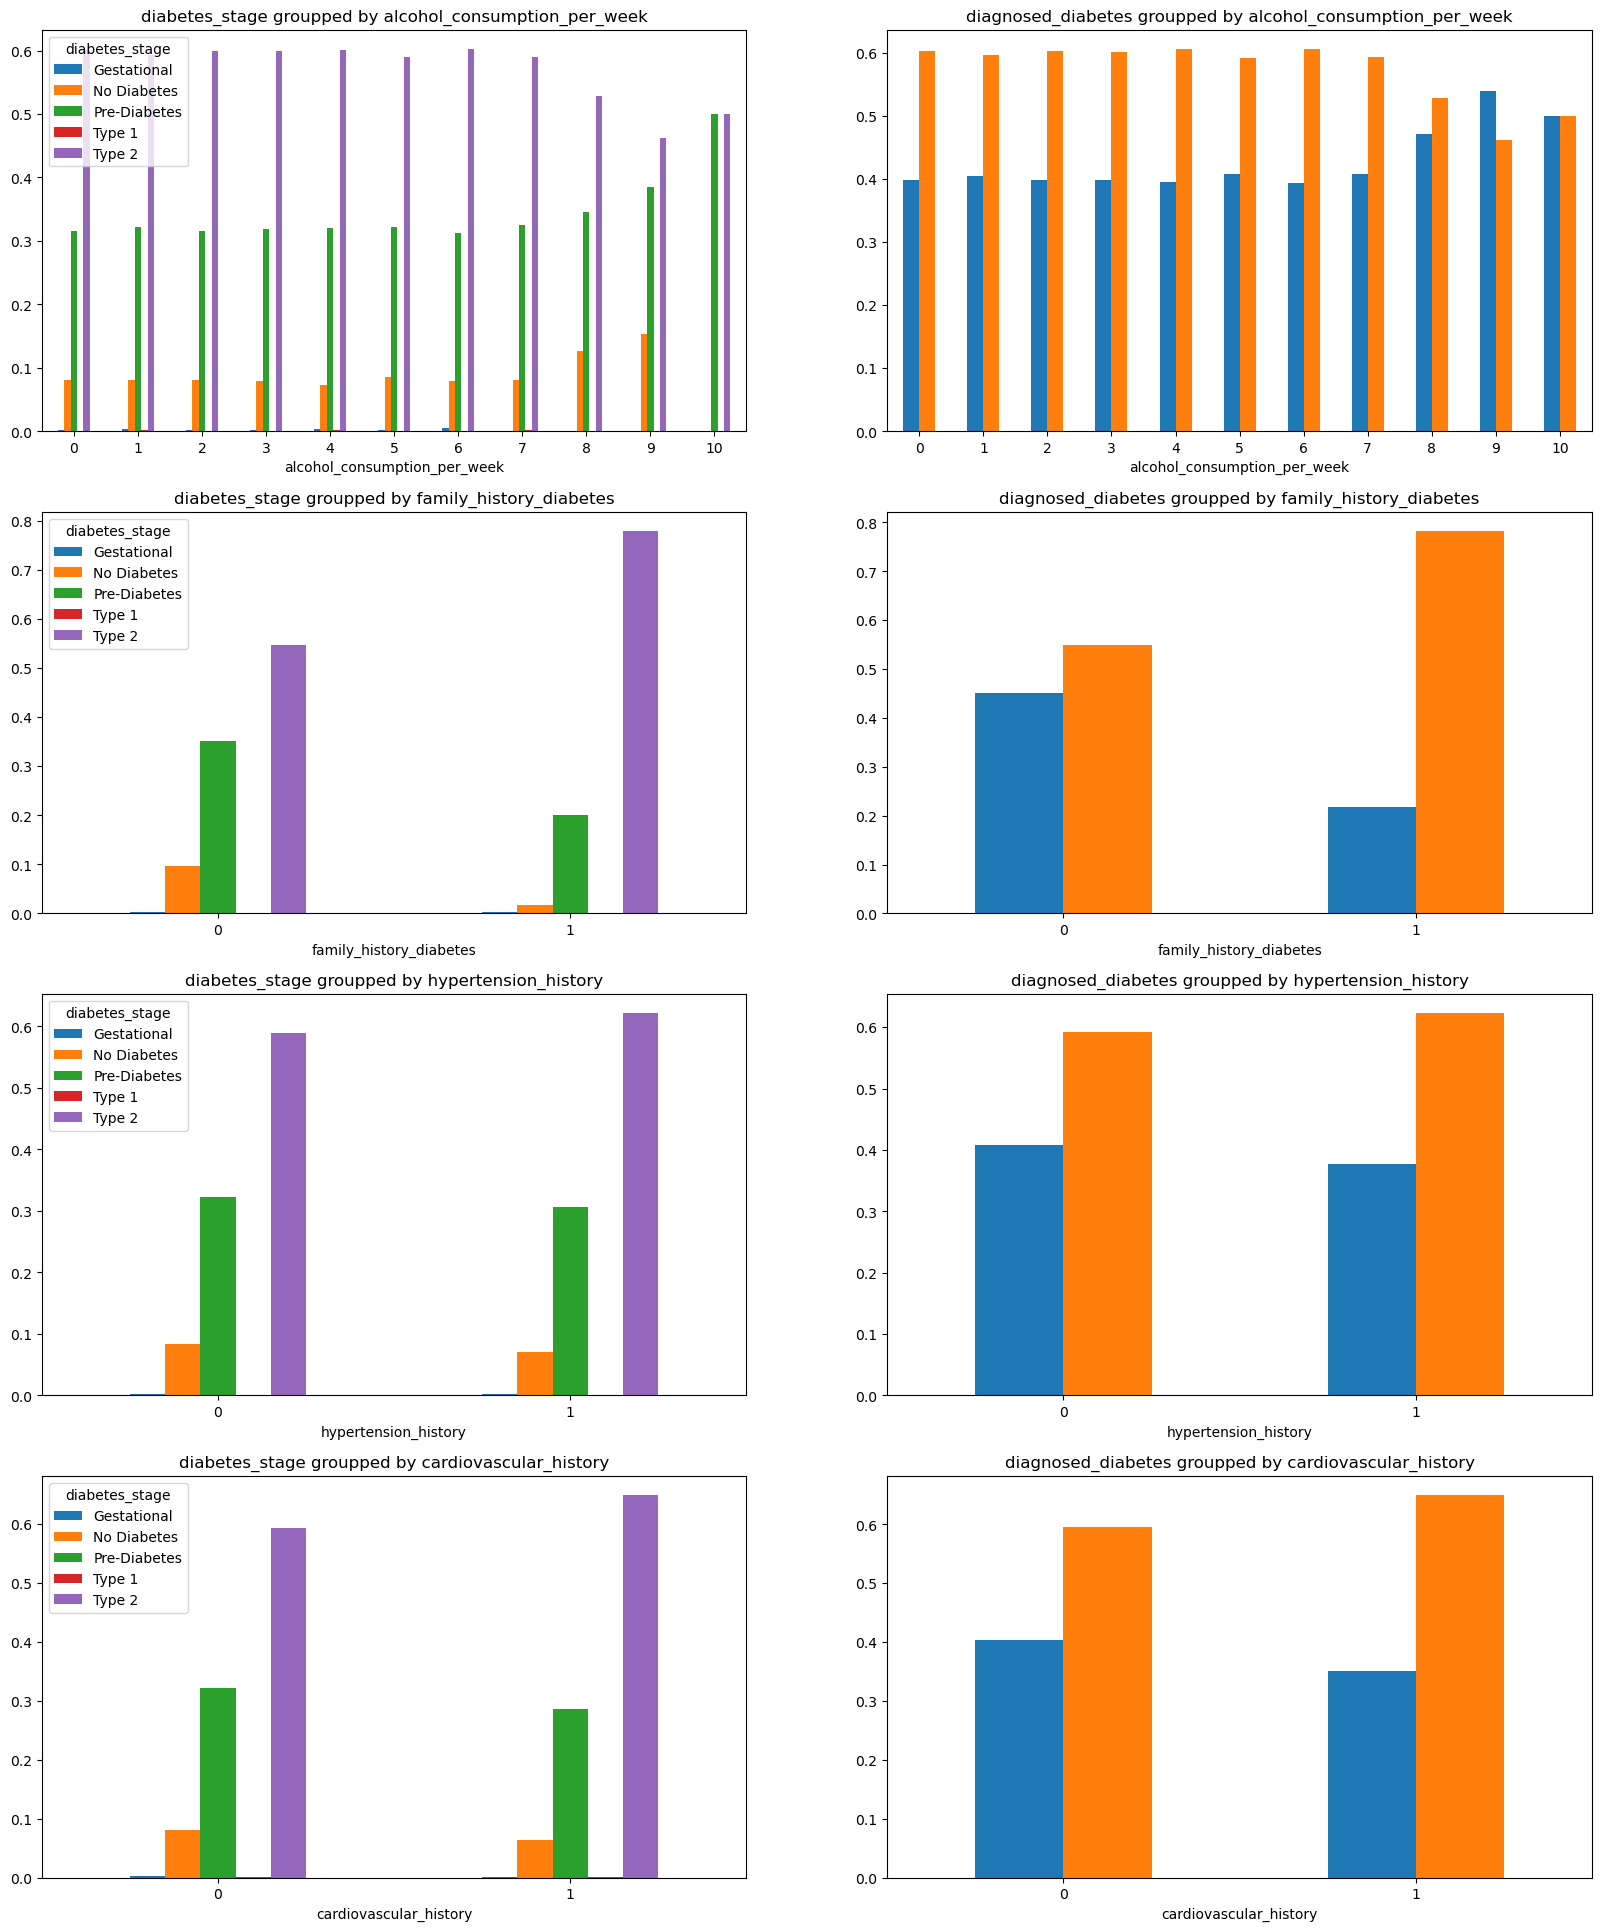

In [18]:
#search of numeric_categoric_columns
fig, ax = plt.subplots(nrows=len(numeric_categoric_columns), ncols=2, figsize=(20, 6*len(numeric_categoric_columns)))
for i, column in enumerate(numeric_categoric_columns):
    pd.crosstab(index=df[column], columns=df["diabetes_stage"], normalize="index").plot(kind="bar", ax=ax[i, 0], legend=True)
    pd.crosstab(index=df[column], columns=df["diagnosed_diabetes"], normalize="index").plot(kind="bar", ax=ax[i, 1], legend=False)
    ax[i, 0].set_title(f'diabetes_stage groupped by {column}')
    ax[i, 1].set_title(f'diagnosed_diabetes groupped by {column}')
    ax[i, 0].xaxis.set_tick_params(labelrotation=0)
    ax[i, 1].xaxis.set_tick_params(labelrotation=0)


plt.tight_layout;  

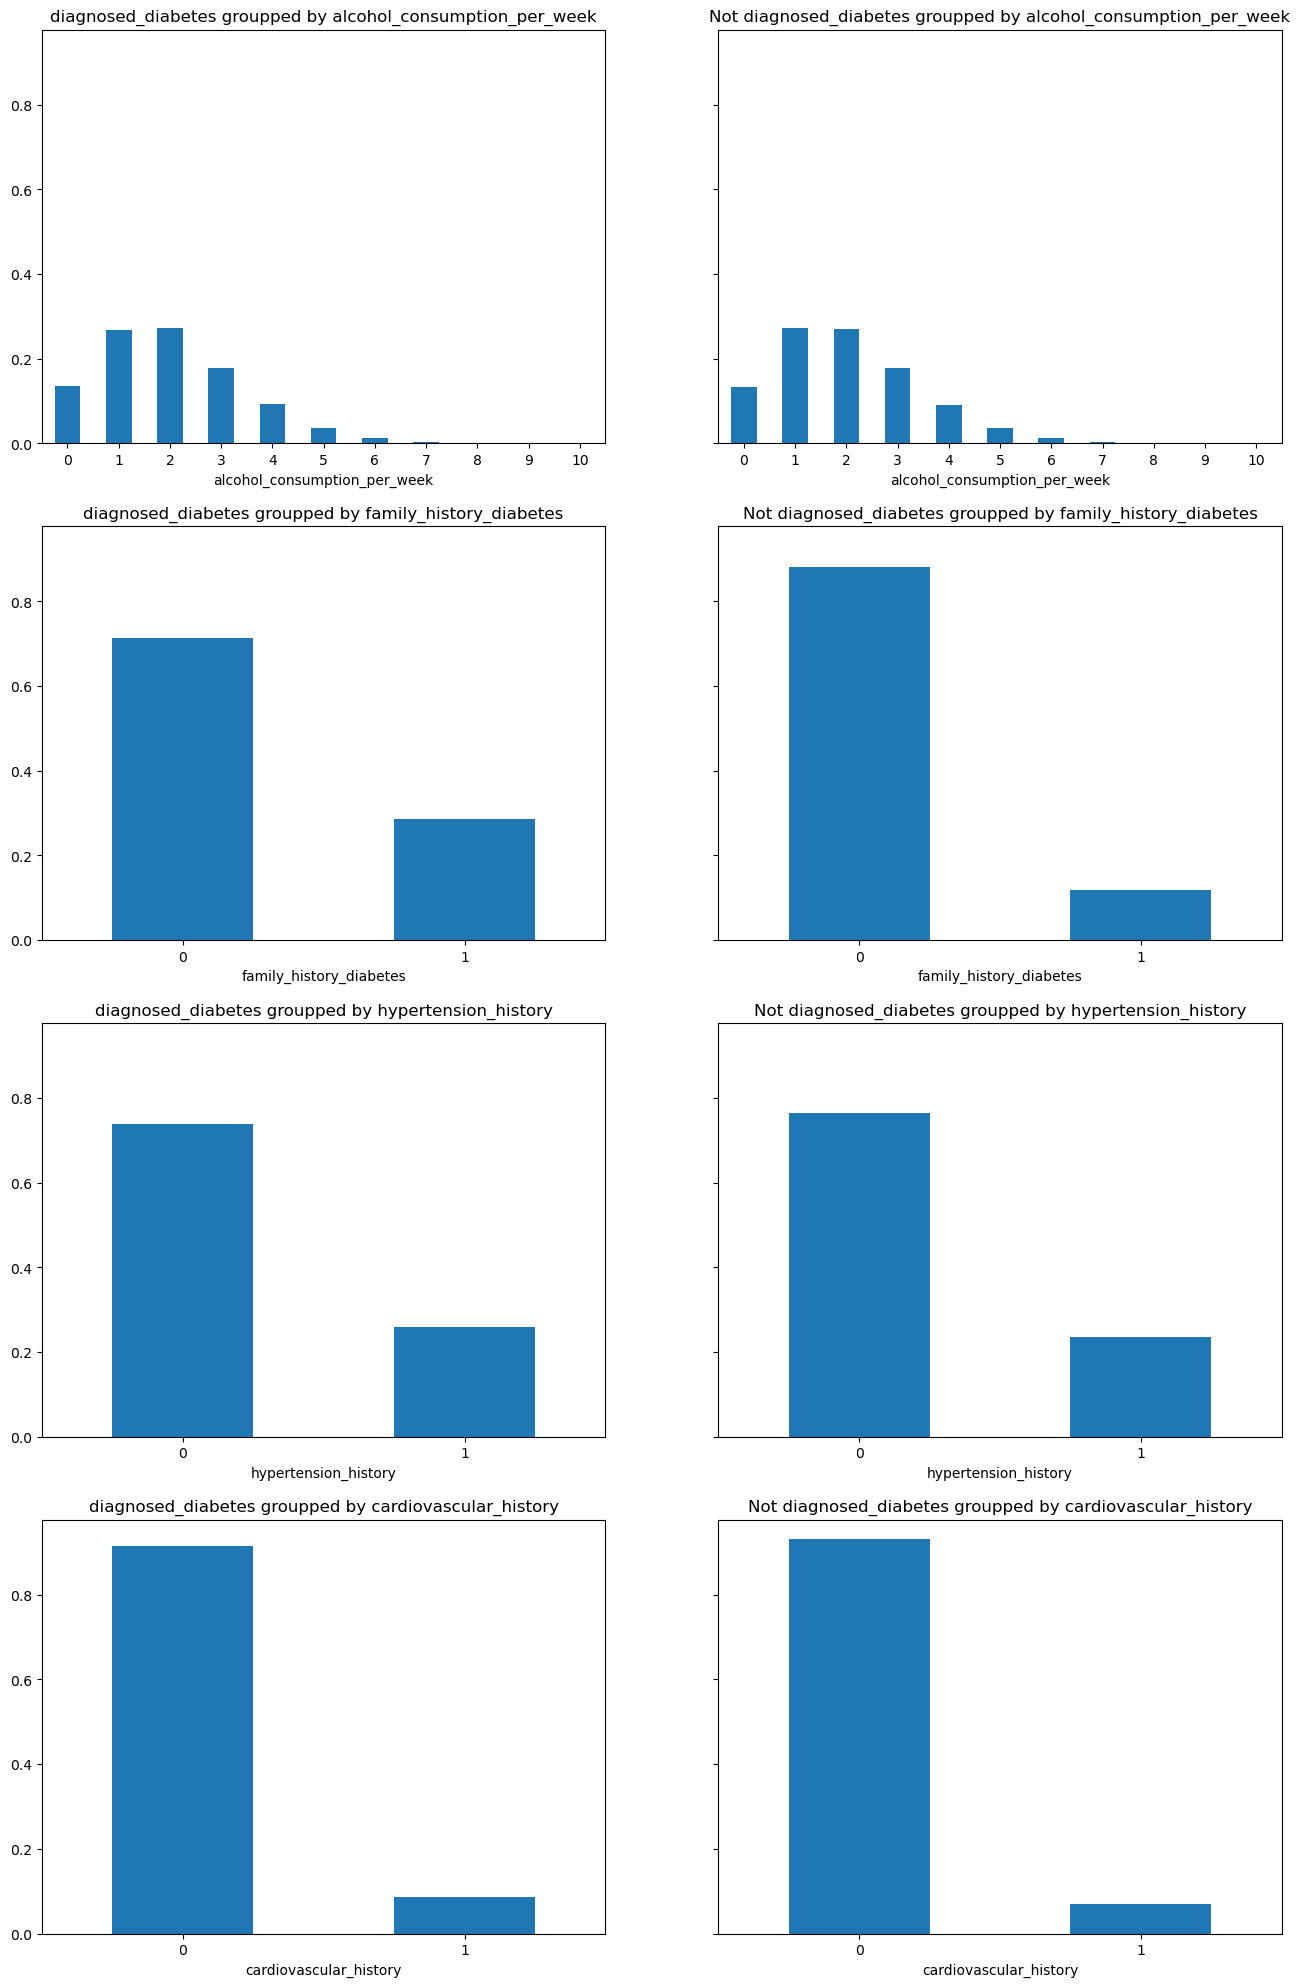

In [19]:
#search of diagnosed_diabetes column by numeric_categoric_columns
df_diabetes_diagnosed = df[df['diagnosed_diabetes'] == 1]
df_not_diabetes_diagnosed = df[df['diagnosed_diabetes'] == 0]
fig, ax = plt.subplots(nrows=len(numeric_categoric_columns), ncols=2, sharey=True, figsize=(16, 4*len(numeric_categoric_columns)))
for i, column in enumerate(numeric_categoric_columns):
    pd.crosstab(index=df_diabetes_diagnosed[column], columns=df_diabetes_diagnosed["diagnosed_diabetes"], normalize="columns").plot(kind="bar", ax=ax[i, 0], legend=False)
    pd.crosstab(index=df_not_diabetes_diagnosed[column], columns=df_not_diabetes_diagnosed["diagnosed_diabetes"], normalize="columns").plot(kind="bar", ax=ax[i, 1], legend=False)
    ax[i, 0].set_title(f'diagnosed_diabetes groupped by {column}')
    ax[i, 1].set_title(f'Not diagnosed_diabetes groupped by {column}')
    ax[i, 0].xaxis.set_tick_params(labelrotation=0)
    ax[i, 1].xaxis.set_tick_params(labelrotation=0)
    ax[i, 0].set_xlabel(column)
    ax[i, 1].set_xlabel(column)

plt.subplots_adjust(top=1.3)
plt.tight_layout;   

Number of diabetics type 2 in this dataset =  59774




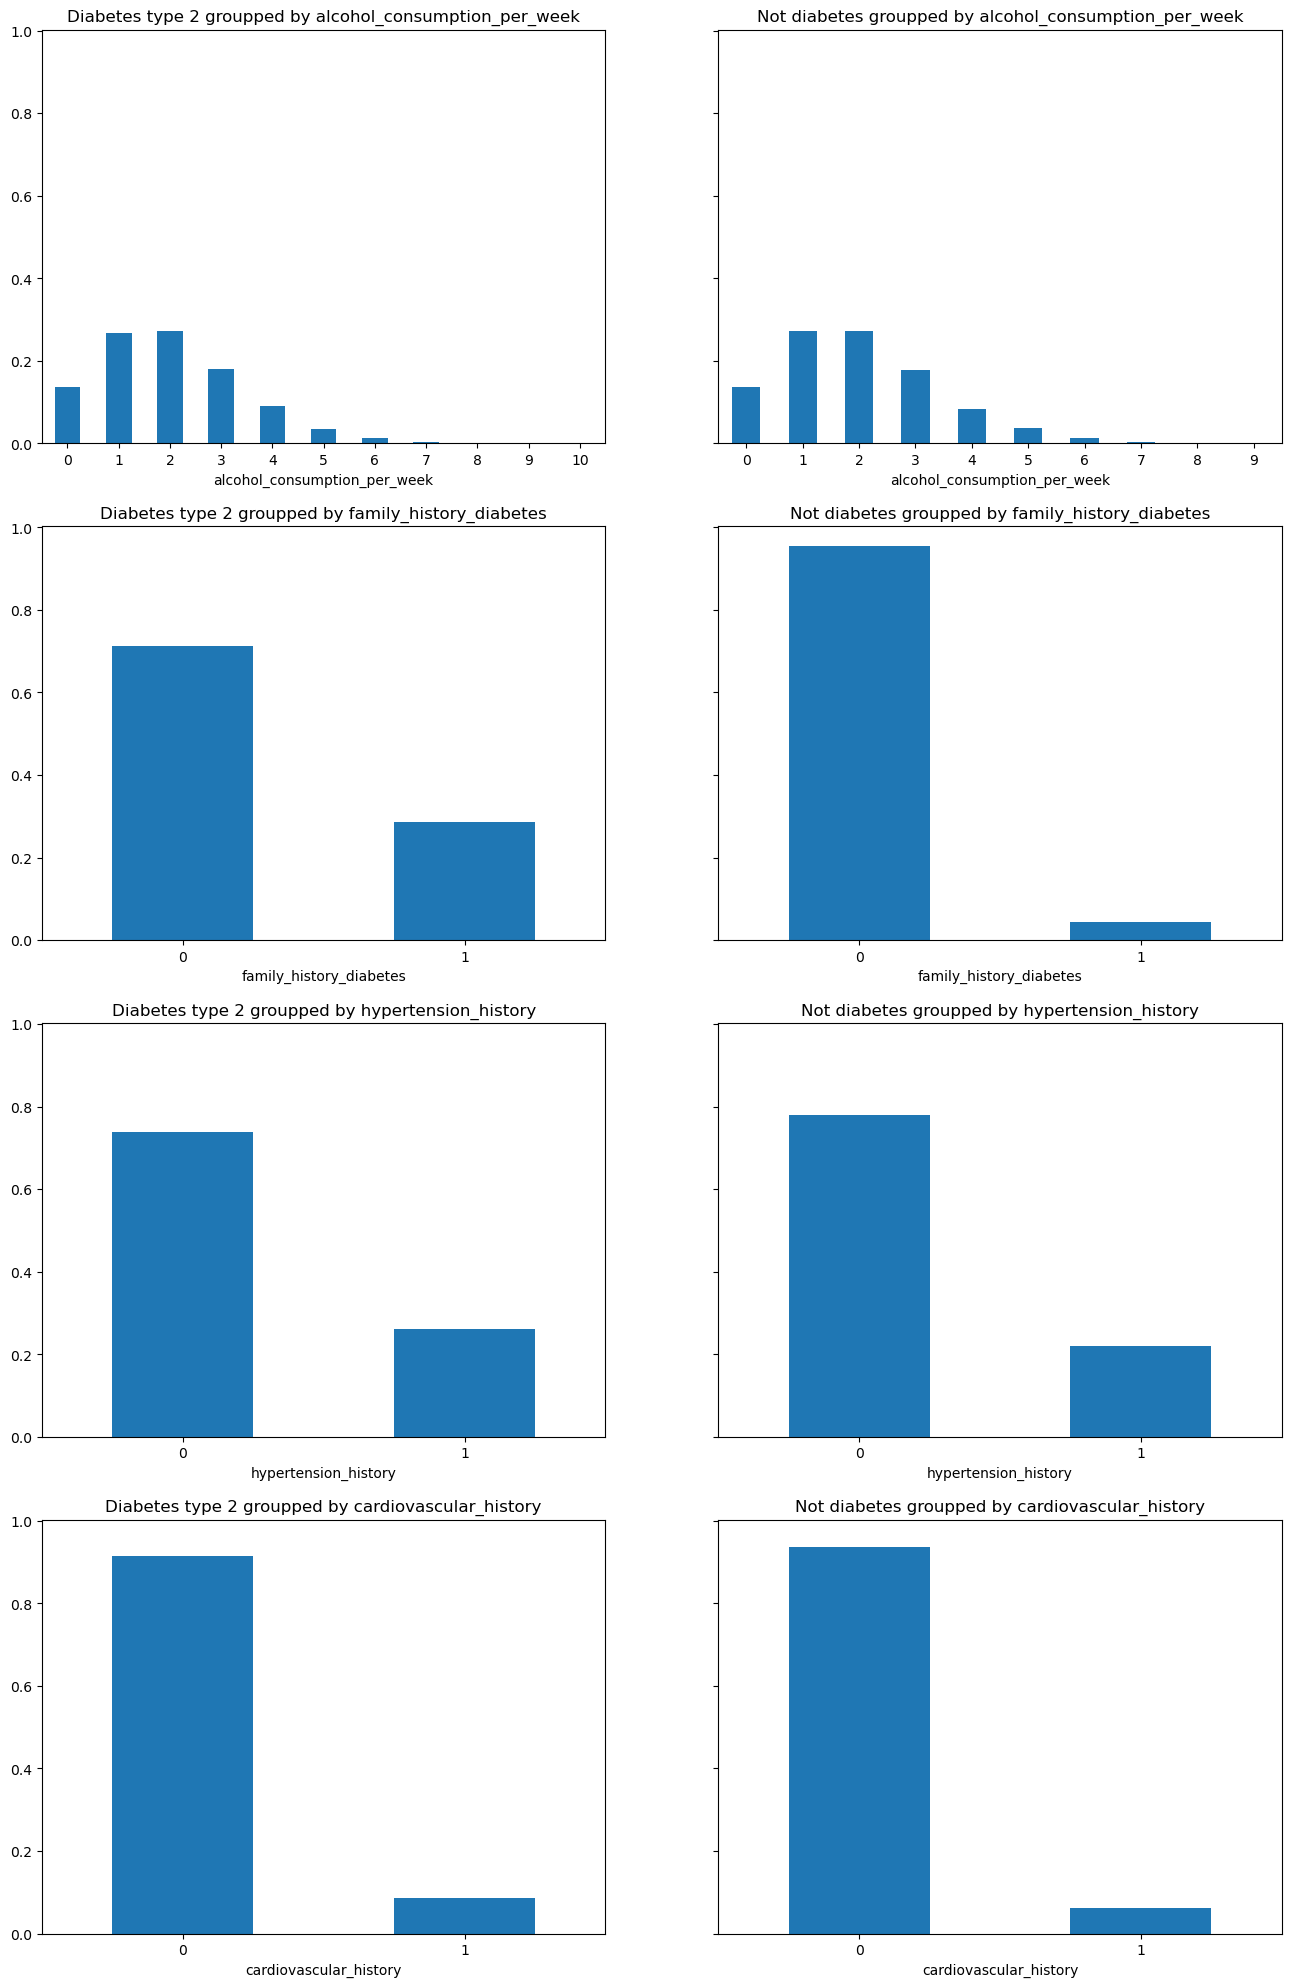

In [20]:
#search of diabetes type 2 by numeric_categoric_columns
df_diabetes_stage_type2 = df[df['diabetes_stage'] == 'Type 2']
df_diabetes_stage_no = df[df['diabetes_stage'] == 'No Diabetes']
print('Number of diabetics type 2 in this dataset = ', len(df_diabetes_stage_type2['diabetes_stage']))
print('\n')

fig, ax = plt.subplots(nrows=len(numeric_categoric_columns), ncols=2, sharey=True, figsize=(16, 4*len(numeric_categoric_columns)))
for i, column in enumerate(numeric_categoric_columns):
    pd.crosstab(index=df_diabetes_stage_type2[column], columns=df_diabetes_stage_type2["diabetes_stage"], normalize="columns").plot(kind="bar", ax=ax[i, 0], legend=False);
    pd.crosstab(index=df_diabetes_stage_no[column], columns=df_diabetes_stage_no["diabetes_stage"], normalize="columns").plot(kind="bar", ax=ax[i, 1], legend=False);
    ax[i, 0].set_title(f'Diabetes type 2 groupped by {column}');
    ax[i, 1].set_title(f'Not diabetes groupped by {column}');
    ax[i, 0].xaxis.set_tick_params(labelrotation=0);
    ax[i, 1].xaxis.set_tick_params(labelrotation=0);
    ax[i, 0].set_xlabel(column)
    ax[i, 1].set_xlabel(column)

plt.subplots_adjust(top=1.3)
plt.tight_layout;  

Number of diabetics Gestational in this dataset =  278




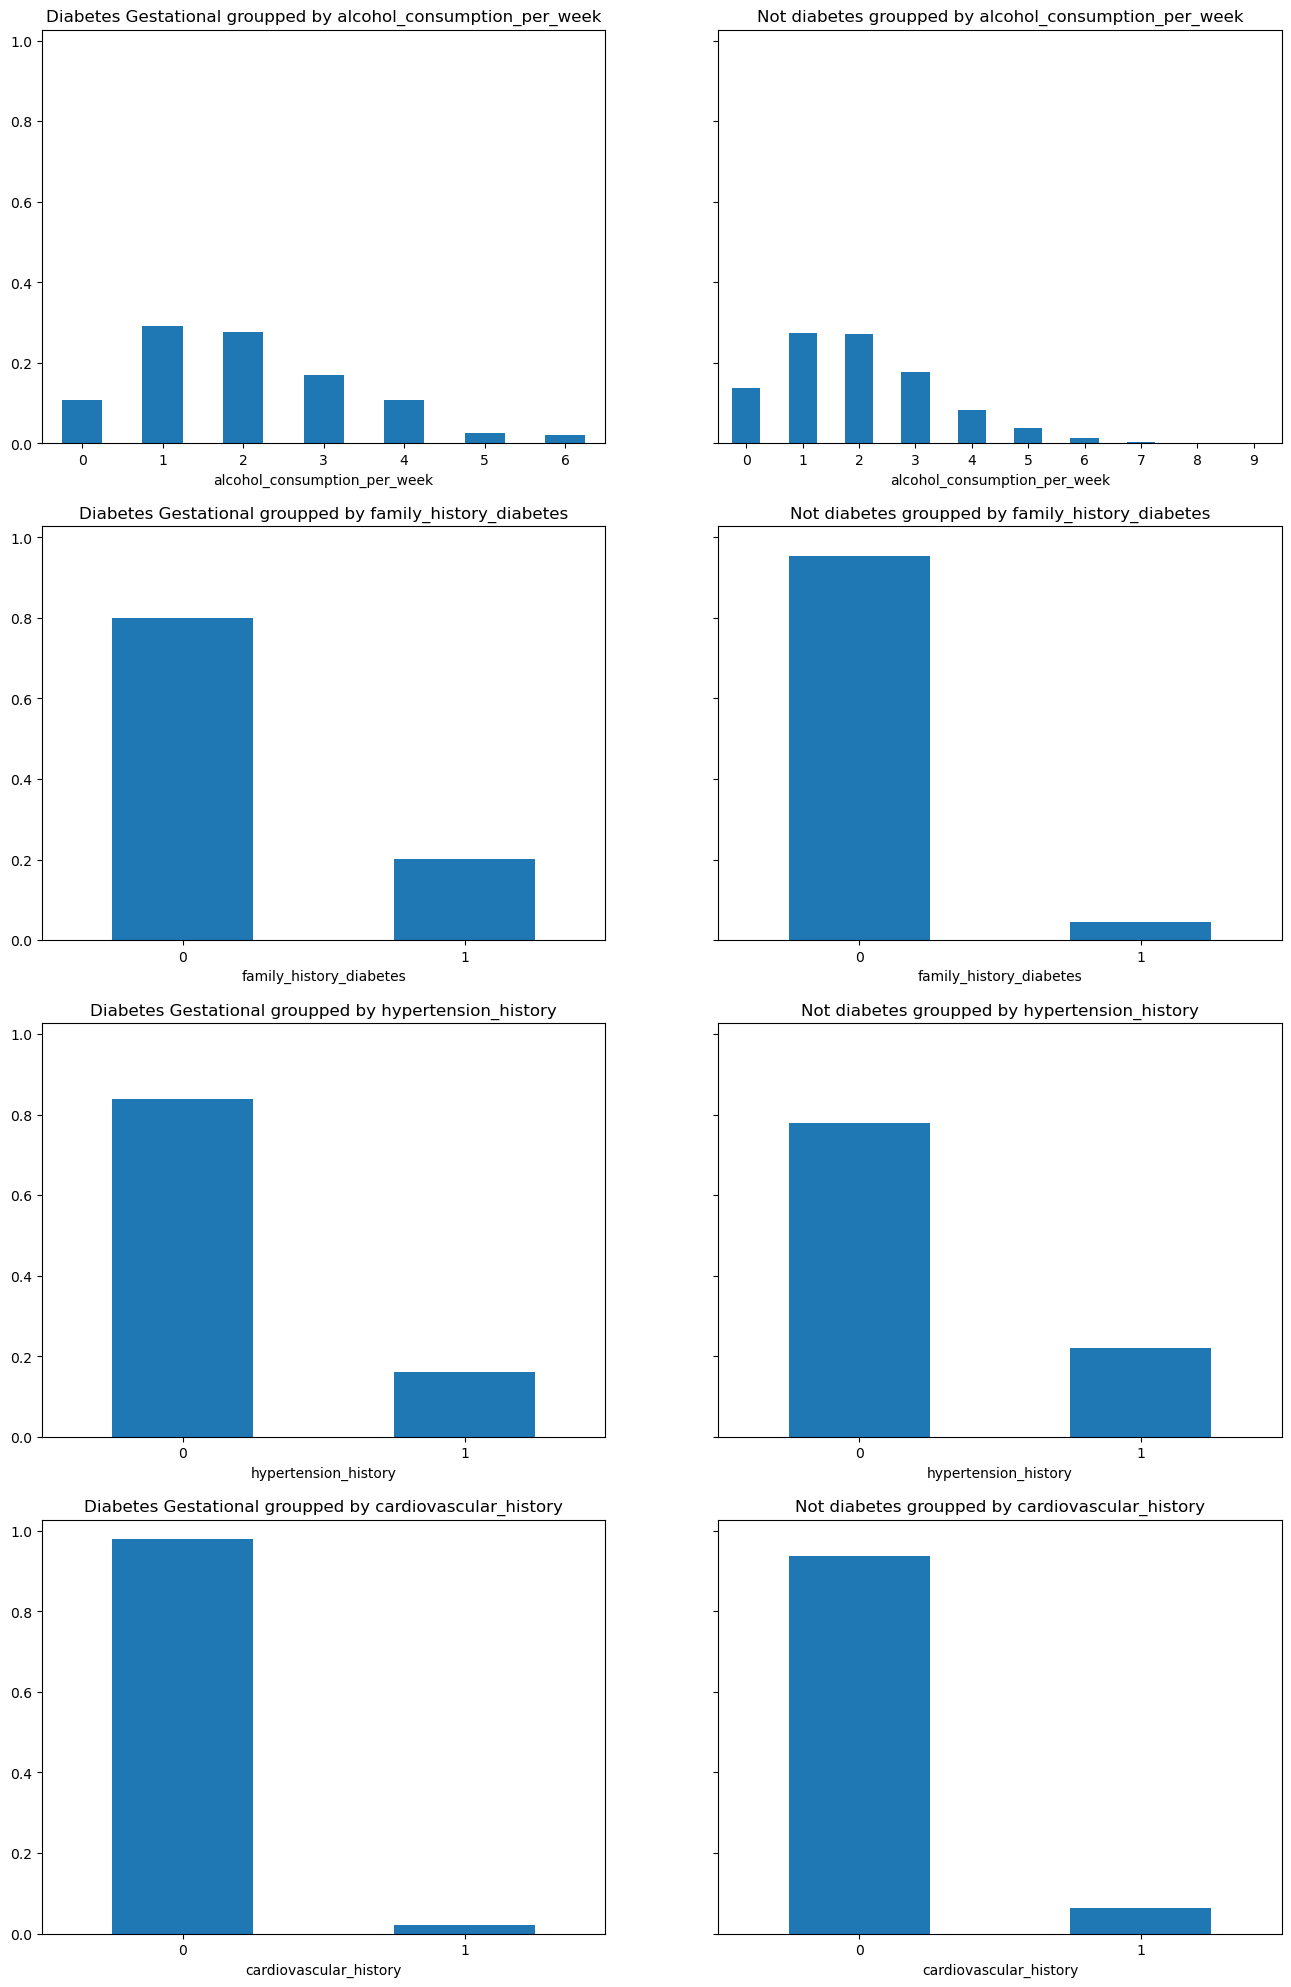

In [21]:
#search of diabetes Gestational by numeric_categoric_columns

df_diabetes_stage_gestational = df[df['diabetes_stage'] == 'Gestational']
df_diabetes_stage_no = df[df['diabetes_stage'] == 'No Diabetes']
print('Number of diabetics Gestational in this dataset = ', len(df_diabetes_stage_gestational['diabetes_stage']))
print('\n')
fig, ax = plt.subplots(nrows=len(numeric_categoric_columns), ncols=2, sharey=True, figsize=(16, 4*len(numeric_categoric_columns)));
for i, column in enumerate(numeric_categoric_columns):
    pd.crosstab(index=df_diabetes_stage_gestational[column], columns=df_diabetes_stage_gestational["diabetes_stage"], normalize="columns").plot(kind="bar", ax=ax[i, 0], legend=False);
    pd.crosstab(index=df_diabetes_stage_no[column], columns=df_diabetes_stage_no["diabetes_stage"], normalize="columns").plot(kind="bar", ax=ax[i, 1], legend=False);
    ax[i, 0].set_title(f'Diabetes Gestational groupped by {column}');
    ax[i, 1].set_title(f'Not diabetes groupped by {column}');
    ax[i, 0].xaxis.set_tick_params(labelrotation=0);
    ax[i, 1].xaxis.set_tick_params(labelrotation=0);
    ax[i, 0].set_xlabel(column);
    ax[i, 1].set_xlabel(column);

plt.subplots_adjust(top=1.3)
plt.tight_layout;  

Number of diabetics Gestational in this dataset =  31845




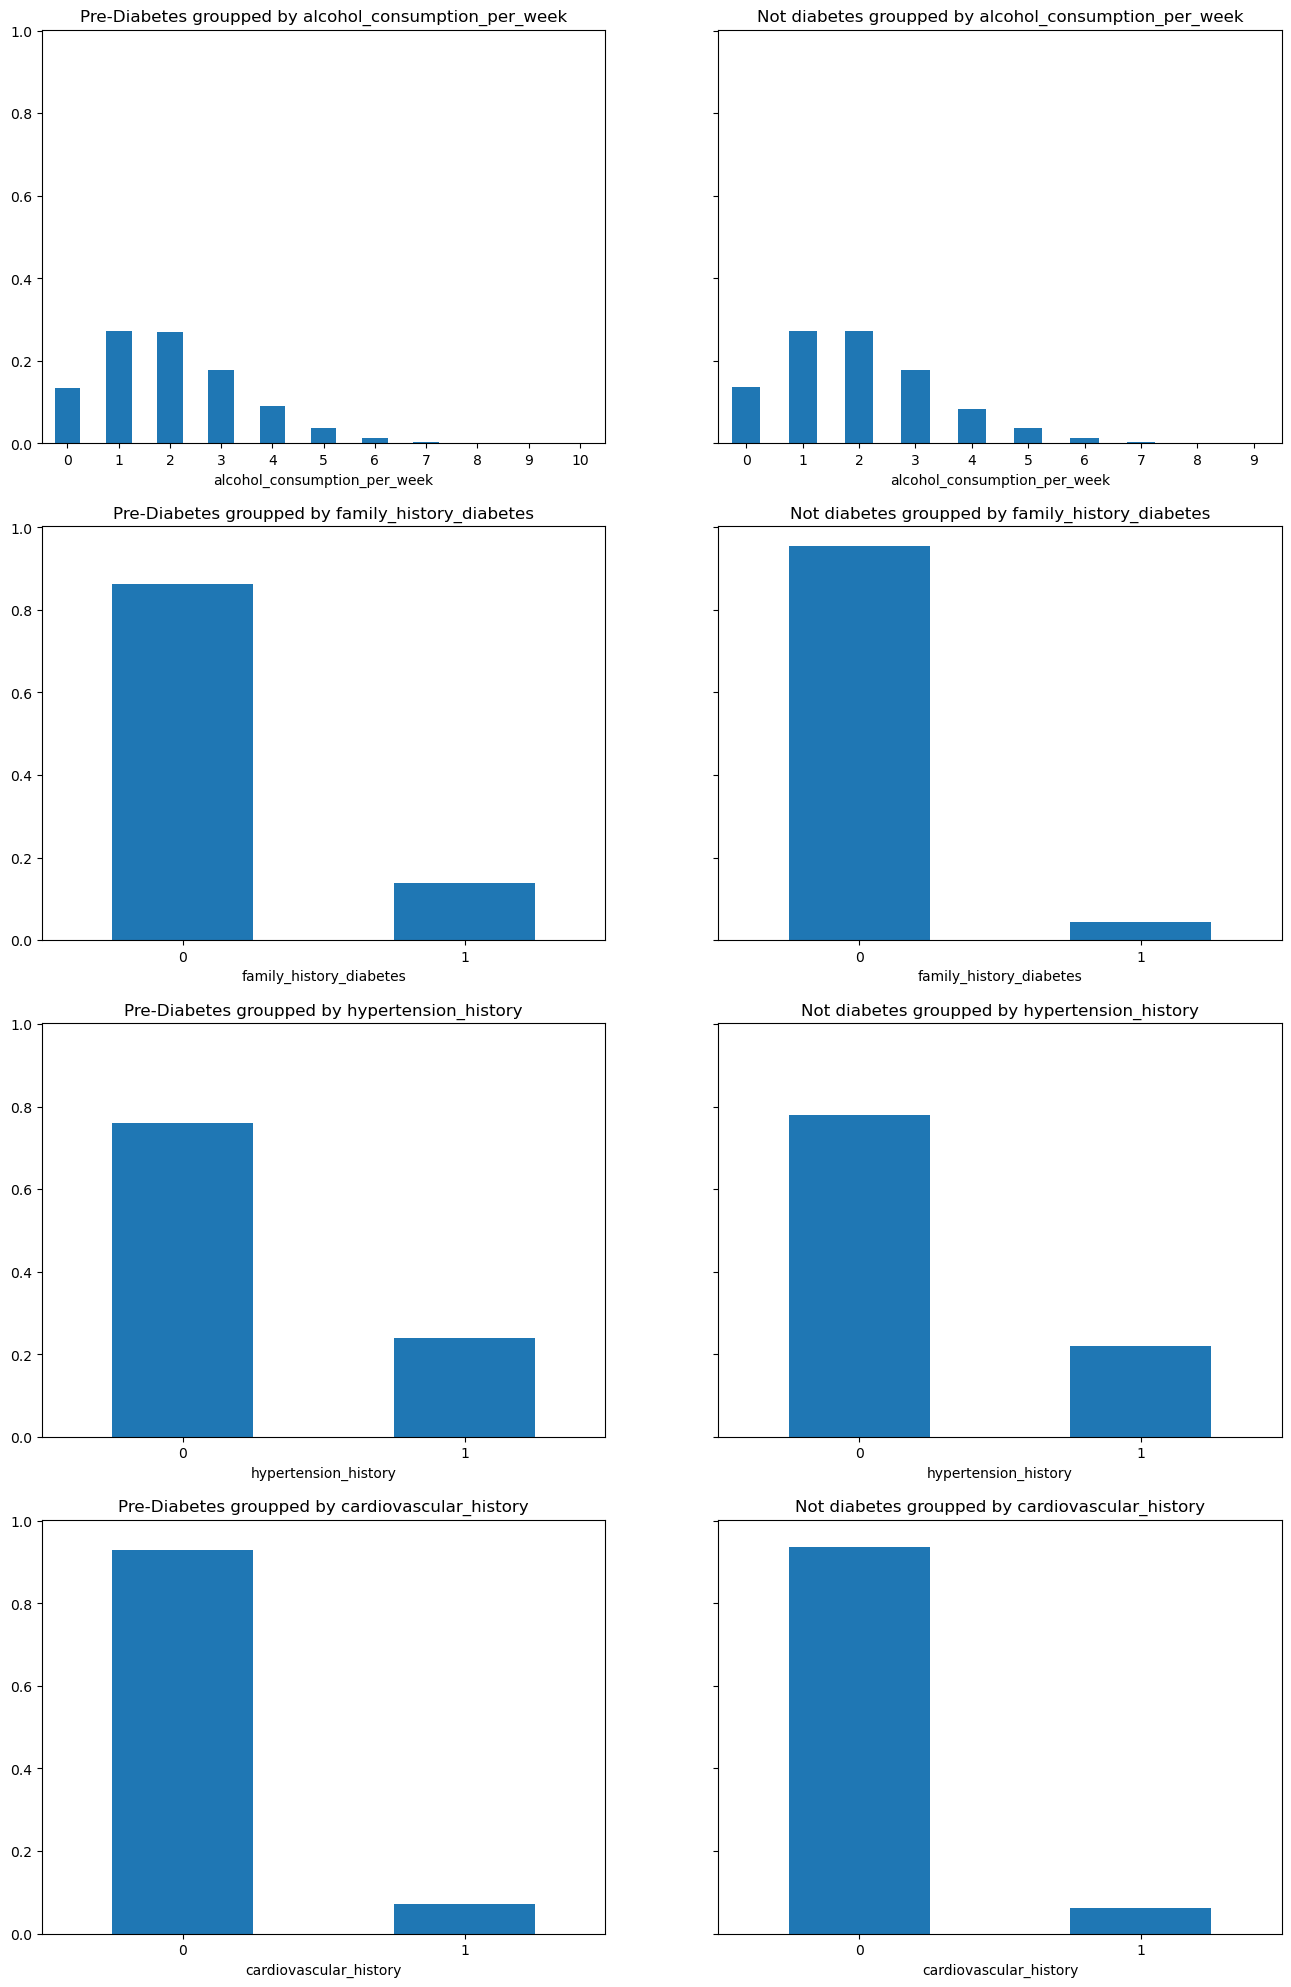

In [22]:
#search of Pre-Diabetes by numeric_categoric_columns
df_diabetes_stage_pre_diabetes = df[df['diabetes_stage'] == 'Pre-Diabetes']
df_diabetes_stage_no = df[df['diabetes_stage'] == 'No Diabetes']
print('Number of diabetics Gestational in this dataset = ', len(df_diabetes_stage_pre_diabetes['diabetes_stage']))
print('\n')
fig, ax = plt.subplots(nrows=len(numeric_categoric_columns), ncols=2, sharey=True, figsize=(16, 4*len(numeric_categoric_columns)));
for i, column in enumerate(numeric_categoric_columns):
    pd.crosstab(index=df_diabetes_stage_pre_diabetes[column], columns=df_diabetes_stage_pre_diabetes["diabetes_stage"], normalize="columns").plot(kind="bar", ax=ax[i, 0], legend=False);
    pd.crosstab(index=df_diabetes_stage_no[column], columns=df_diabetes_stage_no["diabetes_stage"], normalize="columns").plot(kind="bar", ax=ax[i, 1], legend=False);
    ax[i, 0].set_title(f'Pre-Diabetes groupped by {column}');
    ax[i, 1].set_title(f'Not diabetes groupped by {column}');
    ax[i, 0].xaxis.set_tick_params(labelrotation=0);
    ax[i, 1].xaxis.set_tick_params(labelrotation=0);
    ax[i, 0].set_xlabel(column);
    ax[i, 1].set_xlabel(column);

plt.subplots_adjust(top=1.3)
plt.tight_layout;  

Number of diabetics type 1 in this dataset =  122




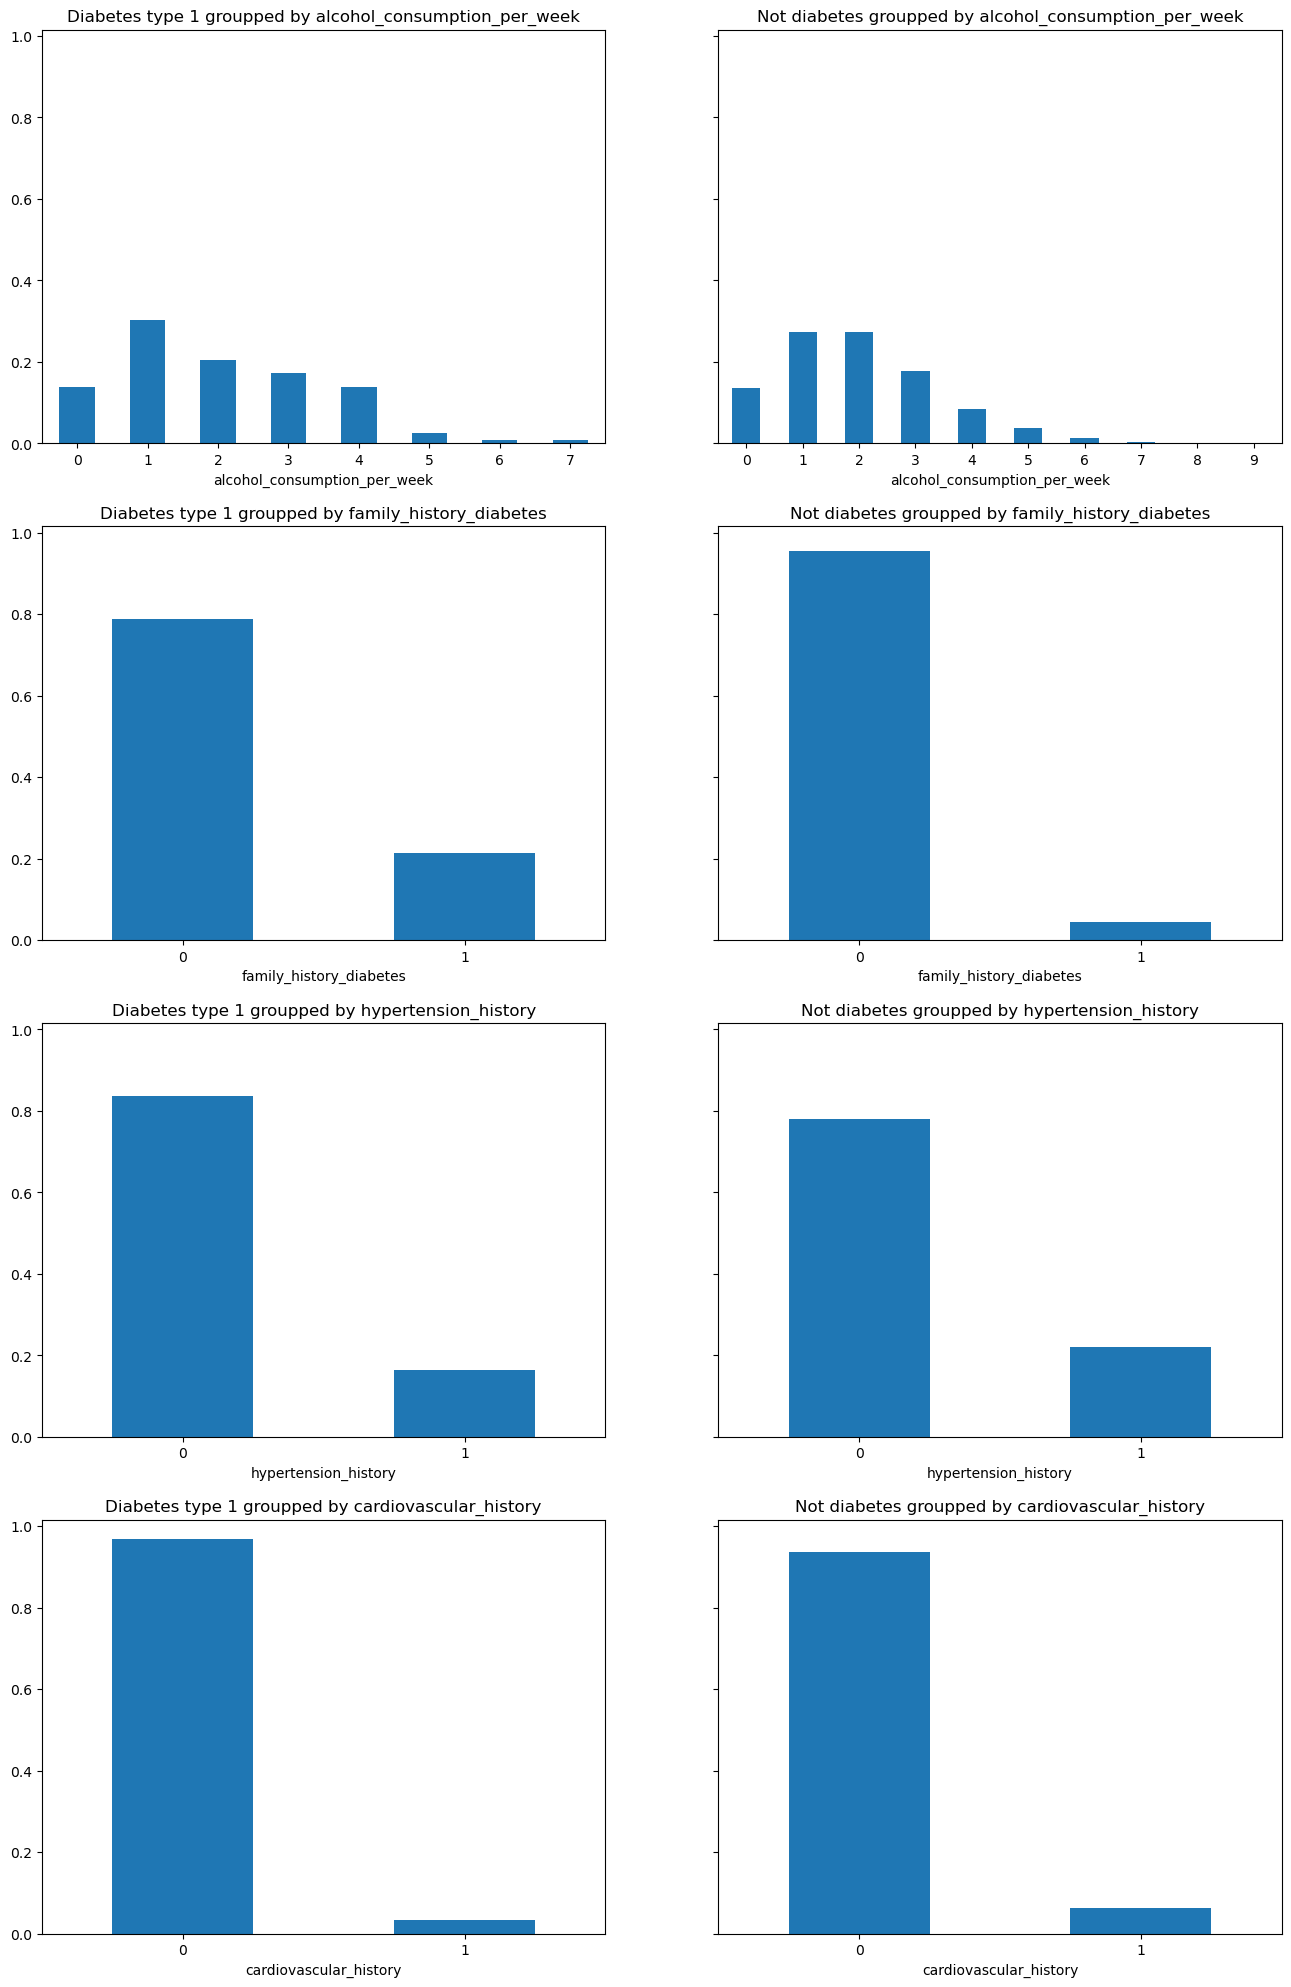

In [23]:
#search of diabetes type 1 by numeric_categoric_columns

df_diabetes_stage_type1 = df[df['diabetes_stage'] == 'Type 1']
df_diabetes_stage_no = df[df['diabetes_stage'] == 'No Diabetes']
print('Number of diabetics type 1 in this dataset = ', len(df_diabetes_stage_type1['diabetes_stage']))
print('\n')
fig, ax = plt.subplots(nrows=len(numeric_categoric_columns), ncols=2, sharey=True, figsize=(16, 4*len(numeric_categoric_columns)))
for i, column in enumerate(numeric_categoric_columns):
    pd.crosstab(index=df_diabetes_stage_type1[column], columns=df_diabetes_stage_type1["diabetes_stage"], normalize="columns").plot(kind="bar", ax=ax[i, 0], legend=False)
    pd.crosstab(index=df_diabetes_stage_no[column], columns=df_diabetes_stage_no["diabetes_stage"], normalize="columns").plot(kind="bar", ax=ax[i, 1], legend=False)
    ax[i, 0].set_title(f'Diabetes type 1 groupped by {column}')
    ax[i, 1].set_title(f'Not diabetes groupped by {column}')
    ax[i, 0].xaxis.set_tick_params(labelrotation=0)
    ax[i, 1].xaxis.set_tick_params(labelrotation=0)
    ax[i, 0].set_xlabel(column)
    ax[i, 1].set_xlabel(column)

plt.subplots_adjust(top=1.3)
plt.tight_layout;  

C:\Users\yamen\AppData\Local\Temp\ipykernel_6708\422442945.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order = df.groupby('diabetes_stage')['age'].median().sort_values().index;


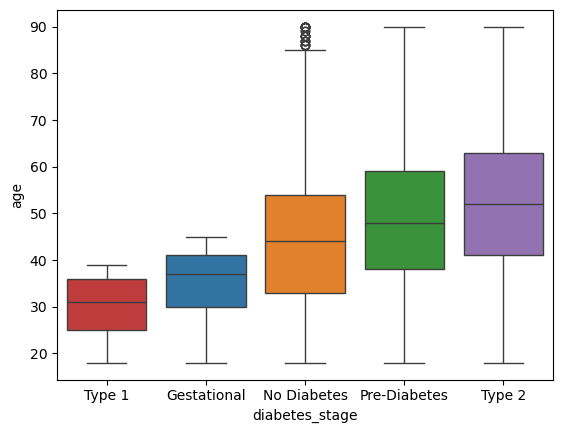

In [24]:
#Sortment of diabetes_stages classes according to age 
order = df.groupby('diabetes_stage')['age'].median().sort_values().index;
sns.boxplot(y='age', x='diabetes_stage', data=df, hue='diabetes_stage', order=order);

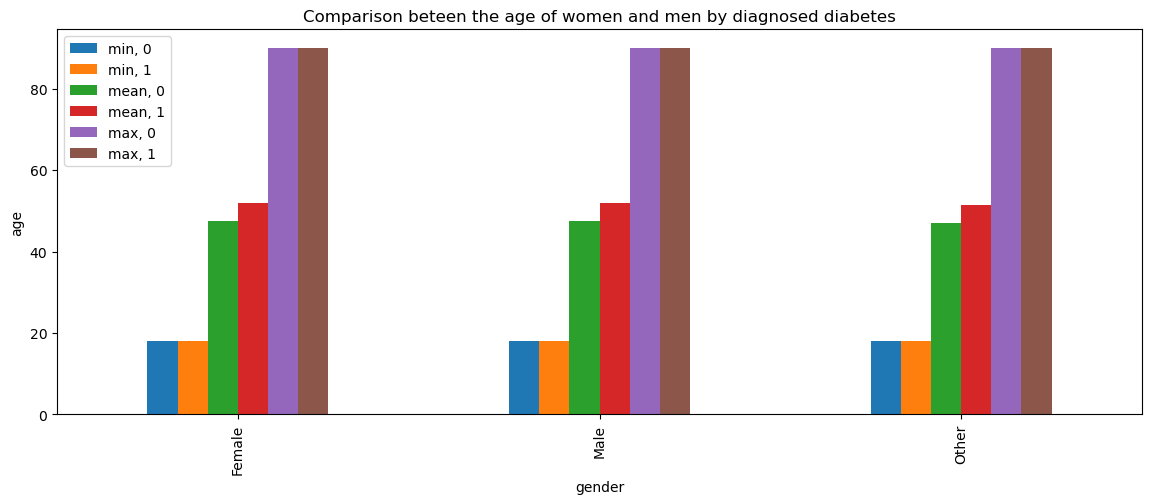

In [25]:
#Comparison beteen the age of women and men by diagnosed diabetes
fig, ax = plt.subplots(figsize=(14, 5))
pd.crosstab(df["gender"], 
            columns=df["diagnosed_diabetes"],
            values=df["age"],
            aggfunc=["min", "mean", "max"]).plot(kind = 'bar', ax=ax);
ax.set_ylabel('age');
plt.legend(['min, 0', 'min, 1', 'mean, 0', 'mean, 1', 'max, 0', 'max, 1']);
ax.set_title('Comparison beteen the age of women and men by diagnosed diabetes');

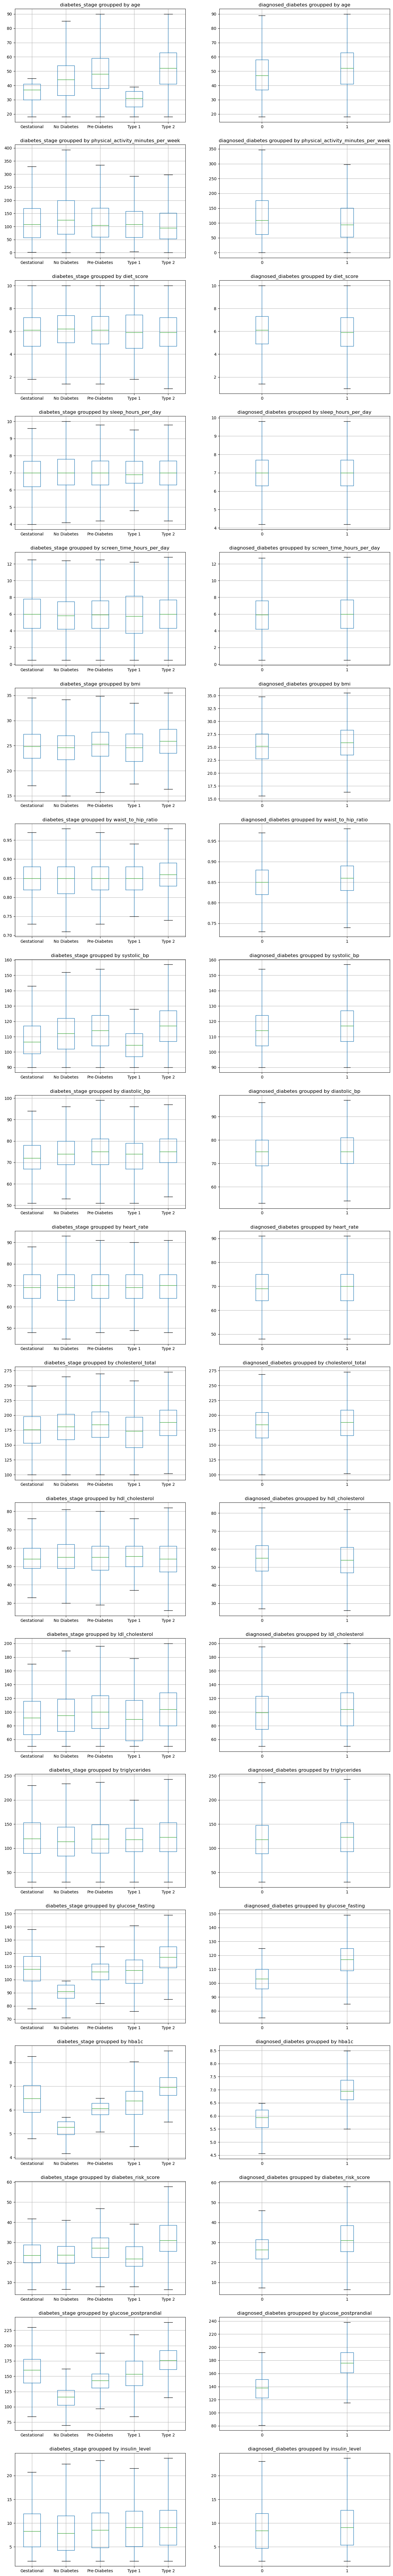

In [26]:
#search by numeric_numeric_columns with boxplot
fig, ax = plt.subplots(nrows=len(numeric_numeric_columns), ncols=2, figsize=(16, 4*len(numeric_numeric_columns)))
for i, column in enumerate(numeric_numeric_columns):
    df.boxplot(by='diabetes_stage', column=column, ax=ax[i, 0], showfliers=False);
    df.boxplot(by='diagnosed_diabetes', column=column, ax=ax[i, 1], showfliers=False);
    ax[i, 0].set_title(f'diabetes_stage groupped by {column}');
    ax[i, 1].set_title(f'diagnosed_diabetes groupped by {column}');
    ax[i, 0].xaxis.set_tick_params(labelrotation=0);
    ax[i, 1].xaxis.set_tick_params(labelrotation=0);
    ax[i, 0].set_xlabel(None)
    ax[i, 1].set_xlabel(None)

plt.suptitle("")
plt.subplots_adjust(top=1.3)
plt.tight_layout;

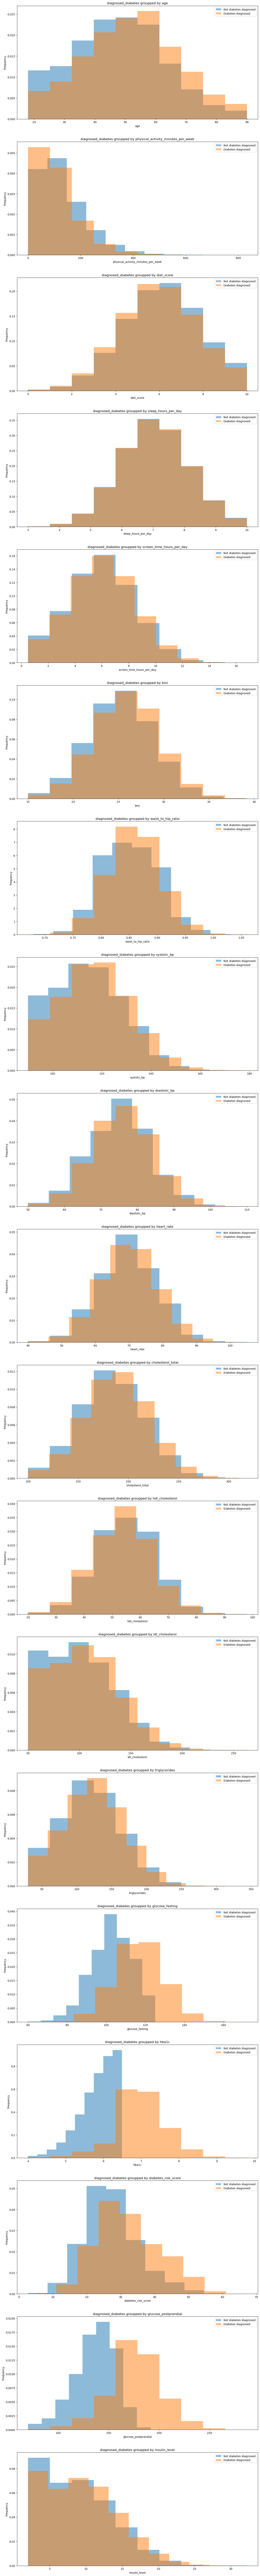

In [27]:
#search of diagnosed_diabetes by numeric_numeric_columns and visualization with histogram
fig, ax = plt.subplots(nrows=len(numeric_numeric_columns), ncols=1, figsize=(16, 5*len(numeric_numeric_columns)));
for i, column in enumerate(numeric_numeric_columns):
    df.groupby('diagnosed_diabetes')[column].plot(kind='hist', ax=ax[i], legend=True, alpha=0.5, density=True);
    ax[i].set_title(f'diagnosed_diabetes groupped by {column}');
    ax[i].xaxis.set_tick_params(labelrotation=0);
    ax[i].set_xlabel(column);
    ax[i].legend(['Not diabetes diagnosed', 'Diabetes diagnosed'])
    
plt.suptitle("");
plt.subplots_adjust(top=1.5);
plt.tight_layout;  

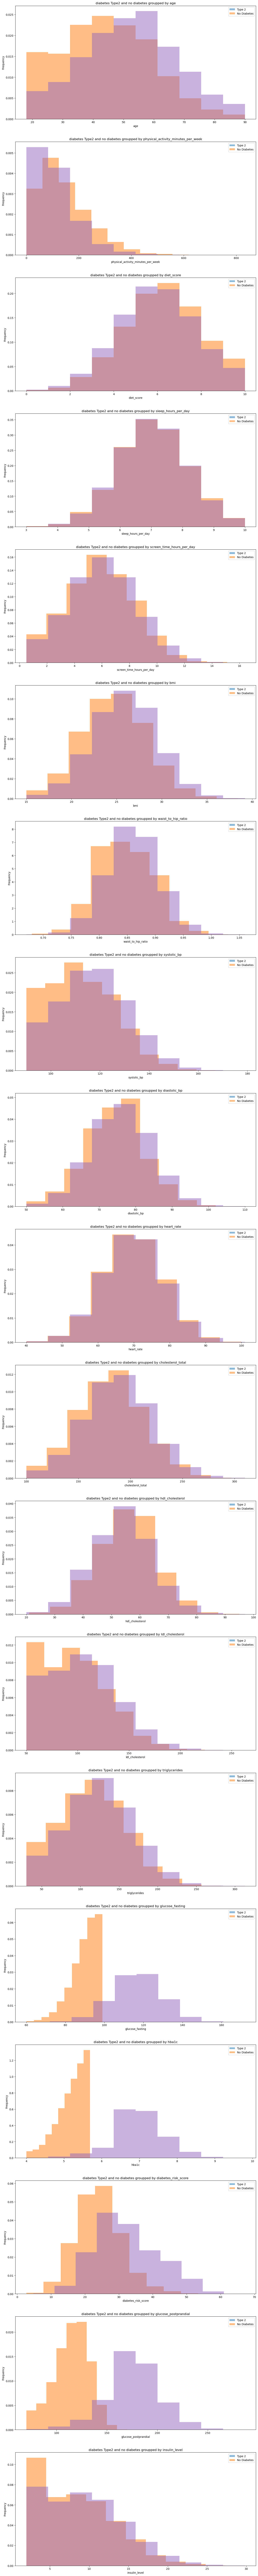

In [28]:
#search of Diabetes Type2 and No Diabetes in diabetes_stage column by numeric_numeric_columns and visualization with histogram
warnings.filterwarnings("ignore")
df_diabetic_stage_type2_no = df[df['diabetes_stage'].isin(['Type 2', 'No Diabetes'])]
fig, ax = plt.subplots(nrows=len(numeric_numeric_columns), ncols=1, figsize=(16, 5*len(numeric_numeric_columns)));
for i, column in enumerate(numeric_numeric_columns):
    df_diabetic_stage_type2_no.groupby('diabetes_stage')[column].plot(kind='hist', ax=ax[i], legend=True, alpha=0.5, density=True);
    ax[i].set_title(f'diabetes Type2 and no diabetes groupped by {column}');
    ax[i].xaxis.set_tick_params(labelrotation=0);
    ax[i].set_xlabel(column);
    ax[i].legend(['Type 2', 'No Diabetes'])

    
plt.suptitle("");
plt.subplots_adjust(top=1.5);
plt.tight_layout;  

5- Linear Regression of diabetes_risk_score with numeric columns

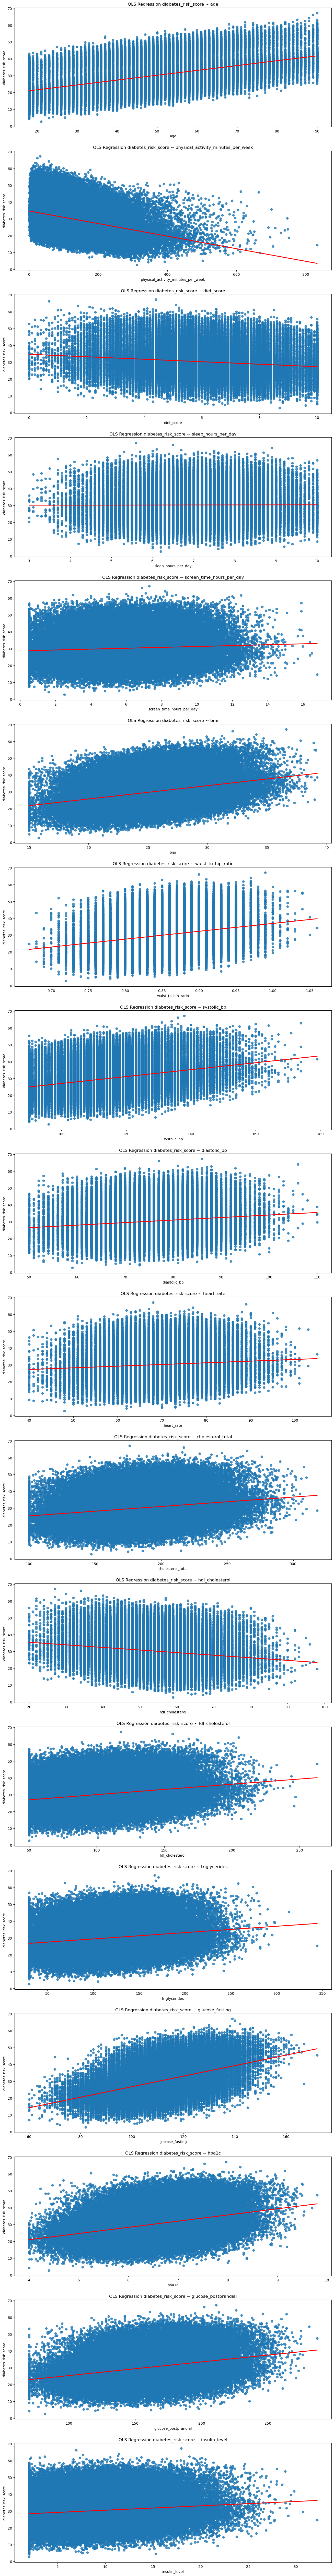

In [29]:
#Linear Regression of diabetes_risk_score with numeric_numeric_columns(visualization)
numeric_numeric_columns_without_diabetes_risk_score = [part for part in numeric_numeric_columns if part != 'diabetes_risk_score']

fig,ax = plt.subplots(nrows=len(numeric_numeric_columns_without_diabetes_risk_score), ncols=1, figsize=(16, 4*len(numeric_numeric_columns_without_diabetes_risk_score)))
for i, col in enumerate(numeric_numeric_columns_without_diabetes_risk_score):
    sns.regplot(x = col, y = 'diabetes_risk_score', data = df, ci = None, line_kws={"color": "red"}, ax=ax[i])
    ax[i].set(xlabel = col,
       ylabel = 'diabetes_risk_score',
       title = f'OLS Regression diabetes_risk_score ~ {col}');
    
plt.subplots_adjust(top=1.5);
plt.suptitle("");
plt.tight_layout;  

In [30]:
#Linear Regression of diabetes_risk_score with numeric_numeric_columns(calculation of correlation for each model)
from sympy import sequence


formulas = [f'diabetes_risk_score ~ {col}' for col in numeric_numeric_columns_without_diabetes_risk_score]
results_list = []
for i, formula in enumerate(formulas):
    model = smf.ols(formula=formula, data=df)
    results = model.fit()

    var = formula.split("~")[1].strip()
    slope = results.params[var]
    
    df_result = pd.DataFrame({
        'Formula': [formula],
        'R-squared': [results.rsquared],
        'Adj. R-squared': [results.rsquared_adj],
        'F p-value': [results.f_pvalue],
        'Intercept': [results.params['Intercept']],
        'slope': slope
                                    
    })

    results_list.append(df_result)

df_results_linear = pd.concat(results_list)
df_results_linear_sorted = df_results_linear.sort_values(by='Adj. R-squared', ascending=False)
pd.options.display.float_format = "{:.3f}".format


def highlight_negative(row:sequence):
    if row["slope"] < 0:
        return ['background-color: red'] * len(row)
    return [''] * len(row)

df_results_linear_sorted = df_results_linear_sorted.reset_index(drop=True)

df_results_linear_sorted_styled = df_results_linear_sorted.style.apply(highlight_negative, axis=1)
df_results_linear_sorted_styled

In [31]:
#logistic regression with diagnosed_diabetes variable
formulas = [f'diagnosed_diabetes ~ {col}' for col in numeric_numeric_columns]
results_list = []
for i, formula in enumerate(formulas):
    model = smf.logit(formula=formula, data=df)
    results = model.fit(disp=False)

    log_likelihood = results.llf
    ll_null = results.llnull
    pseudo_r_squared = results.prsquared
    llr_pvalue = results.llr_pvalue
    intercept = results.params['Intercept']
    var = formula.split("~")[1].strip()
    slope = results.params[var]

    
    df_result = pd.DataFrame({'Formula': formula,
        'Log-Likelihood': log_likelihood,
        'LL-Null': ll_null,
        'Pseudo R-squared': pseudo_r_squared,
        'LLR p-value': llr_pvalue,
        'Intercept': intercept,
        'slope': slope}, index=[0])
    
    results_list.append(df_result)

df_results_logit = pd.concat(results_list)
df_results_logit_sorted = df_results_logit.sort_values(by='Pseudo R-squared', ascending=False)
pd.options.display.float_format = "{:.3f}".format


def highlight_negative(row:sequence):
    if row["slope"] < 0:
        return ['background-color: red'] * len(row)
    return [''] * len(row)

df_results_logit_sorted = df_results_logit_sorted.reset_index(drop=True)
df_results_logit_sorted_styled = df_results_logit_sorted.style.apply(highlight_negative, axis=1)
df_results_logit_sorted_styled

The value of hba1c by probability of diagnosed diabetics of 50% = 6.29


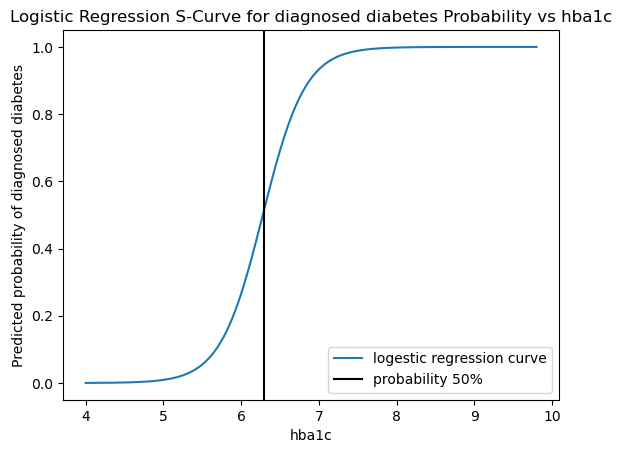

In [67]:
#We take here the first four models for logistic regression
#hba1c
model = smf.logit(formula='diagnosed_diabetes ~ hba1c', data=df)

results = model.fit(disp=False)

value_range = np.linspace(df['hba1c'].min(), df['hba1c'].max(), 300)
value_range_df = pd.DataFrame(value_range)
value_range_df.columns=['hba1c']
predicted_hba1c=results.predict(value_range_df)

fig, ax = plt.subplots()

ax.plot(value_range, predicted_hba1c);
ax.set_xlabel("hba1c");
ax.set_ylabel("Predicted probability of diagnosed diabetes");
ax.set_title('Logistic Regression S-Curve for diagnosed diabetes Probability vs hba1c')
p_50_index = predicted_hba1c[predicted_hba1c>=0.5].index[0]
p_50_value = value_range[p_50_index]
ax.axvline(p_50_value, color='black')
print('The value of hba1c by probability of diagnosed diabetics of 50% =', p_50_value.round(2))

plt.legend(['logestic regression curve', 'probability 50%'])

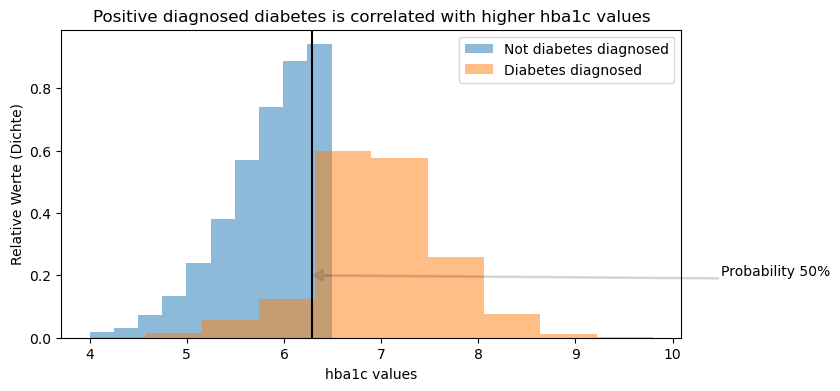

In [68]:
#hba1c visualization by histogram
fig, ax=plt.subplots(figsize=(8, 4))
df.groupby('diagnosed_diabetes')['hba1c'].plot(kind='hist', ax=ax, legend=True, alpha=0.5, density=True);
ax.set_title('Positive diagnosed diabetes is correlated with higher hba1c values');
ax.set_xlabel('hba1c values');
ax.set_ylabel('Relative Werte (Dichte)')
ax.legend(['Not diabetes diagnosed', 'Diabetes diagnosed'])
ax.axvline(p_50_value, color='black');

ax.annotate(text='Probability 50%',
          xy=(p_50_value, 0.2),
          xytext=(10.5, 0.2),
          arrowprops=dict(facecolor='black', alpha=0.1, width=1, headwidth=8, headlength=8));

plt.show()

The value of glucose_postprandial by probability of diagnosed diabetics of 50% = 150.56
The value of glucose_postprandial by probability of diagnosed diabetics of 65% = 158.54


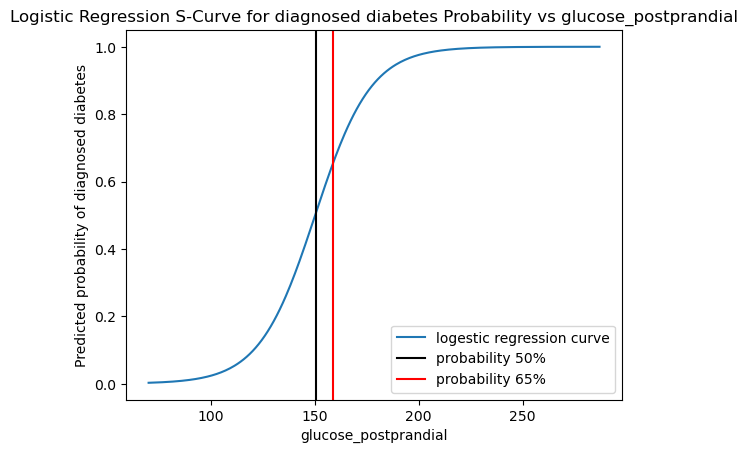

In [96]:
#logistic regression glucose_postprandial

model = smf.logit(formula='diagnosed_diabetes ~ glucose_postprandial', data=df)

results = model.fit(disp=False)

value_range = np.linspace(df['glucose_postprandial'].min(), df['glucose_postprandial'].max(), 300)
value_range_df = pd.DataFrame(value_range)
value_range_df.columns=['glucose_postprandial']
predicted_glucose_postprandial = results.predict(value_range_df)

fig, ax = plt.subplots()

ax.plot(value_range, predicted_glucose_postprandial);
ax.set_xlabel("glucose_postprandial");
ax.set_ylabel("Predicted probability of diagnosed diabetes");
ax.set_title('Logistic Regression S-Curve for diagnosed diabetes Probability vs glucose_postprandial')
p_50_index = predicted_glucose_postprandial[predicted_glucose_postprandial>=0.5].index[0]
p_50_value = value_range[p_50_index]
ax.axvline(p_50_value, color='black');
print('The value of glucose_postprandial by probability of diagnosed diabetics of 50% =', p_50_value.round(2))
p_65_index = predicted_glucose_postprandial[predicted_glucose_postprandial>=0.65].index[0]
p_65_value = value_range[p_65_index]
ax.axvline(p_65_value, color='red');
print('The value of glucose_postprandial by probability of diagnosed diabetics of 65% =', p_65_value.round(2))


plt.legend(['logestic regression curve', 'probability 50%', 'probability 65%']);

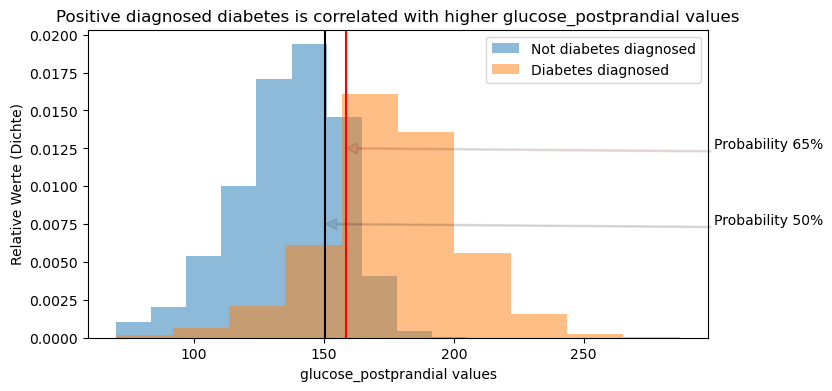

In [98]:
#glucose_postprandial visualization by histogram
fig, ax=plt.subplots(figsize=(8, 4))
df.groupby('diagnosed_diabetes')['glucose_postprandial'].plot(kind='hist', ax=ax, legend=True, alpha=0.5, density=True);
ax.set_title('Positive diagnosed diabetes is correlated with higher glucose_postprandial values');
ax.set_xlabel('glucose_postprandial values');
ax.set_ylabel('Relative Werte (Dichte)')
ax.legend(['Not diabetes diagnosed', 'Diabetes diagnosed'])
ax.axvline(p_50_value, color='black');
ax.axvline(p_65_value, color='red');

ax.annotate(text='Probability 50%',
          xy=(p_50_value, 0.0075),
          xytext=(300, 0.0075),
          arrowprops=dict(facecolor='black', alpha=0.1, width=1, headwidth=8, headlength=8));

ax.annotate(text='Probability 65%',
          xy=(p_65_value, 0.0125),
          xytext=(300, 0.0125),
          arrowprops=dict(facecolor='red', alpha=0.1, width=1, headwidth=8, headlength=8));

plt.show()

The value of glucose_fasting by probability of diagnosed diabetics of 50% = 106.07
The value of glucose_fasting by probability of diagnosed diabetics of 70% = 109.82


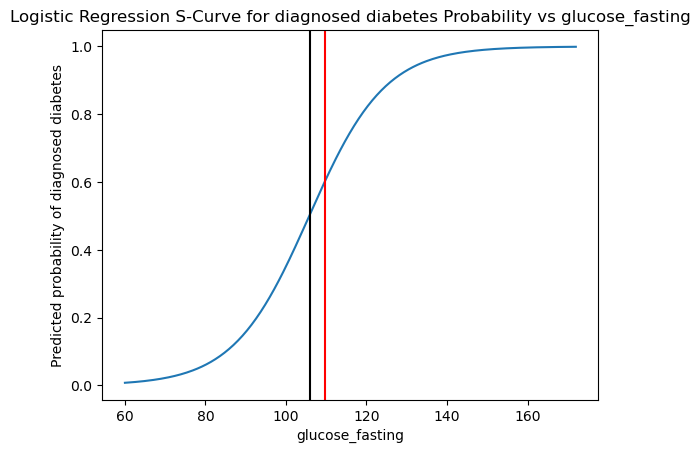

In [85]:
#logistic regression glucose_fasting

model = smf.logit(formula='diagnosed_diabetes ~ glucose_fasting', data=df)

results = model.fit(disp=False)

value_range = np.linspace(df['glucose_fasting'].min(), df['glucose_fasting'].max(), 300)
value_range_df = pd.DataFrame(value_range)
value_range_df.columns=['glucose_fasting']
predicted_glucose_postprandial = results.predict(value_range_df)

fig, ax = plt.subplots()

ax.plot(value_range, predicted_glucose_postprandial);
ax.set_xlabel("glucose_fasting");
ax.set_ylabel("Predicted probability of diagnosed diabetes");
ax.set_title('Logistic Regression S-Curve for diagnosed diabetes Probability vs glucose_fasting')
p_50_index = predicted_glucose_postprandial[predicted_glucose_postprandial>=0.5].index[0]
p_50_value = value_range[p_50_index]
ax.axvline(p_50_value, color='black');
print('The value of glucose_fasting by probability of diagnosed diabetics of 50% =', p_50_value.round(2))

p_60_index = predicted_glucose_postprandial[predicted_glucose_postprandial>=0.6].index[0]
p_60_value = value_range[p_60_index]
ax.axvline(p_60_value, color='red');
print('The value of glucose_fasting by probability of diagnosed diabetics of 70% =', p_60_value.round(2))

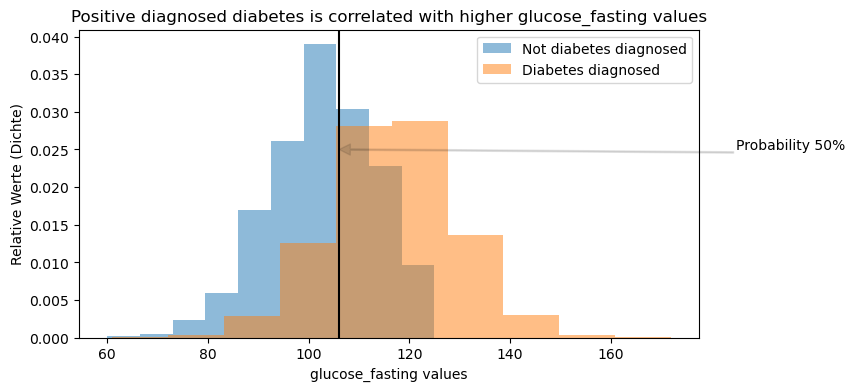

In [90]:
#glucose_fasting visualization by histogram
fig, ax=plt.subplots(figsize=(8, 4))
df.groupby('diagnosed_diabetes')['glucose_fasting'].plot(kind='hist', ax=ax, legend=True, alpha=0.5, density=True);
ax.set_title('Positive diagnosed diabetes is correlated with higher glucose_fasting values');
ax.set_xlabel('glucose_fasting values');
ax.set_ylabel('Relative Werte (Dichte)')
ax.legend(['Not diabetes diagnosed', 'Diabetes diagnosed'])
ax.axvline(p_50_value, color='black');

ax.annotate(text='Probability 50%',
          xy=(p_50_value, 0.025),
          xytext=(185, 0.025),
          arrowprops=dict(facecolor='black', alpha=0.1, width=1, headwidth=8, headlength=8));

plt.show()